<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_151715/2096090751.py:6: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('msd_1.out', comment='#', sep='\s+', header=None)


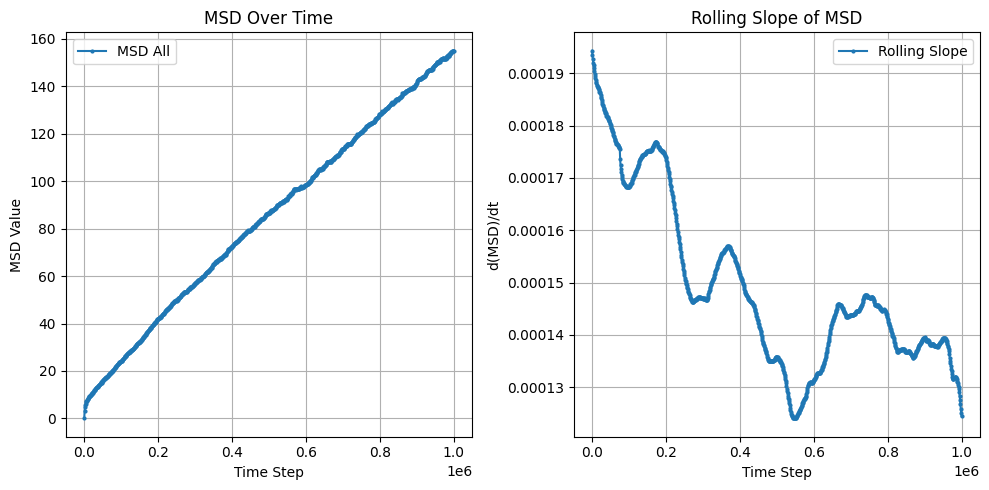

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the same MSD data (adapt as needed)
data = pd.read_csv('msd_1.out', comment='#', sep='\s+', header=None)
data.columns = ["TimeStep", "v_msd_all_val", "v_msd_1_val", "v_msd_8_val", "v_msd_9_val"]

time = data["TimeStep"].values
msd_all = data["v_msd_all_val"].values

# Define a function to compute a rolling slope over a window of points
def rolling_slope(x_vals, y_vals, window=101):
    """
    Returns an array of slopes, where the slope at each index i is 
    computed by fitting a line to x_vals[i - half : i + half] 
    (bounded by the data range).
    """
    half = window // 2
    slopes = []
    
    for i in range(len(x_vals)):
        left = max(0, i - half)
        right = min(len(x_vals), i + half)
        
        # Fit a 1st-degree polynomial (a line) to the subset
        # polyfit returns [slope, intercept]
        slope, _ = np.polyfit(x_vals[left:right], y_vals[left:right], 1)
        slopes.append(slope)
        
    return np.array(slopes)

# Choose a window size (e.g., 101 points). You may need to adjust
# based on your data resolution and how smooth you want the slope.
window_size = 150

slopes_all = rolling_slope(time, msd_all, window=window_size)

# Plot the original MSD
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, msd_all, marker='o', markersize=2, label='MSD All')
plt.xlabel("Time Step")
plt.ylabel("MSD Value")
plt.title("MSD Over Time")
plt.grid(True)
plt.legend()

# Plot the rolling slope
plt.subplot(1, 2, 2)
plt.plot(time, slopes_all, marker='o', markersize=2, label='Rolling Slope')
plt.xlabel("Time Step")
plt.ylabel("d(MSD)/dt")
#plt.ylim(0,0.0005)
plt.title("Rolling Slope of MSD")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Example pseudo-code
start_fit = 0.1e6   # pick a time after early transients
end_fit   = 0.2e6   # the final time
mask = (time >= start_fit) & (time <= end_fit)

slope, intercept = np.polyfit(time[mask], msd_all[mask], 1)
print("Fitted slope from time", start_fit, "to", end_fit, ":", slope)


Fitted slope from time 100000.0 to 200000.0 : 0.00017745216773442046


Data shape: (1001, 5)
First few rows:
       0        1        2        3        4
0     0  0.00000  0.00000  0.00000  0.00000
1  1000  3.21620  3.50108  3.51384  3.51770
2  2000  4.81596  5.23902  5.46144  4.83924
3  3000  5.68838  6.21001  6.45996  5.58439
4  4000  6.19688  6.74792  7.07787  6.13109
Time values (first 5): [   0 1000 2000 3000 4000]
MSD All (first 5): [0.      3.2162  4.81596 5.68838 6.19688]
Using dt = 1000.0


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_151715/3458092515.py:6: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('msd_1.out', comment='#', sep='\s+', header=None)


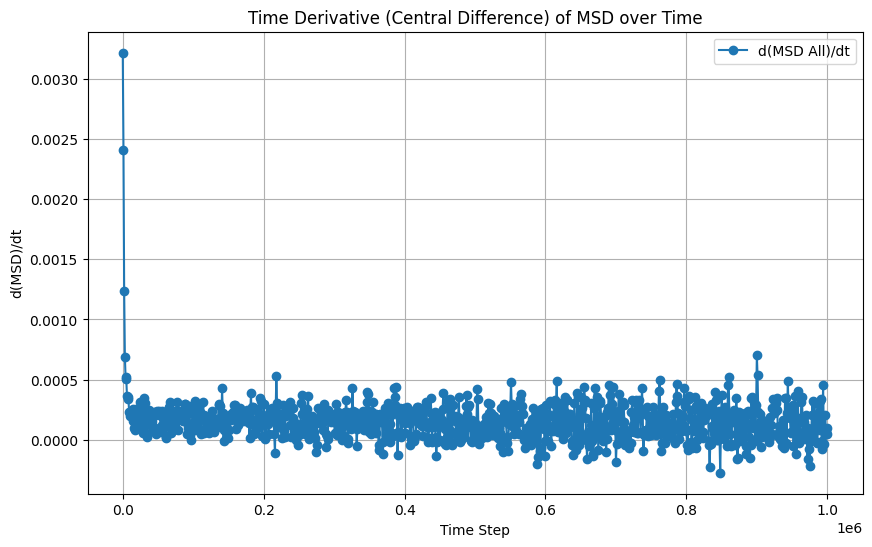

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the msd.out file using sep='\s+' (instead of delim_whitespace)
data = pd.read_csv('msd_1.out', comment='#', sep='\s+', header=None)

# Print some diagnostics for debugging
print("Data shape:", data.shape)
print("First few rows:\n", data.head())

# Assign column names based on the file structure.
data.columns = ["TimeStep", "v_msd_all_val", "v_msd_1_val", "v_msd_8_val", "v_msd_9_val"]

# Check if the data are empty
if data.empty:
    raise ValueError("The data file 'msd_1.out' is empty. Please check the file.")

# Extract time and MSD values
time = data["TimeStep"].values
msd_all = data["v_msd_all_val"].values
msd_1   = data["v_msd_1_val"].values
msd_8   = data["v_msd_8_val"].values
msd_9   = data["v_msd_9_val"].values

# Print initial values for verification
print("Time values (first 5):", time[:5])
print("MSD All (first 5):", msd_all[:5])

# Check time differences (dt); if duplicates exist, warn and use the mean of nonzero differences.
time_diffs = np.diff(time)
if np.any(time_diffs == 0):
    print("Warning: Some adjacent time values are identical; using a constant dt from nonzero differences.")
    nonzero_diffs = time_diffs[time_diffs != 0]
    if len(nonzero_diffs) > 0:
        dt = np.mean(nonzero_diffs)
    else:
        dt = 1.0  # fallback to 1 if all differences are zero
else:
    dt = np.mean(time_diffs)

print("Using dt =", dt)

# Compute the derivative (central difference approximation)
# Using dt as constant spacing
d_msd_all = np.gradient(msd_all, dt)
d_msd_1   = np.gradient(msd_1, dt)
d_msd_8   = np.gradient(msd_8, dt)
d_msd_9   = np.gradient(msd_9, dt)

# Plot the derivatives
plt.figure(figsize=(10, 6))
plt.plot(time, d_msd_all, label='d(MSD All)/dt', marker='o')
#plt.plot(time, d_msd_1, label='d(MSD Unsat Heads)/dt', marker='o')
#plt.plot(time, d_msd_8, label='d(MSD Sat Heads)/dt', marker='o')
#plt.plot(time, d_msd_9, label='d(MSD Chol Heads)/dt', marker='o')

plt.xlabel("Time Step")
plt.ylabel("d(MSD)/dt")
plt.title("Time Derivative (Central Difference) of MSD over Time")
plt.legend()
plt.grid(True)
plt.show()


Computing MSD: 100%|██████████| 1001/1001 [01:57<00:00,  8.51it/s]


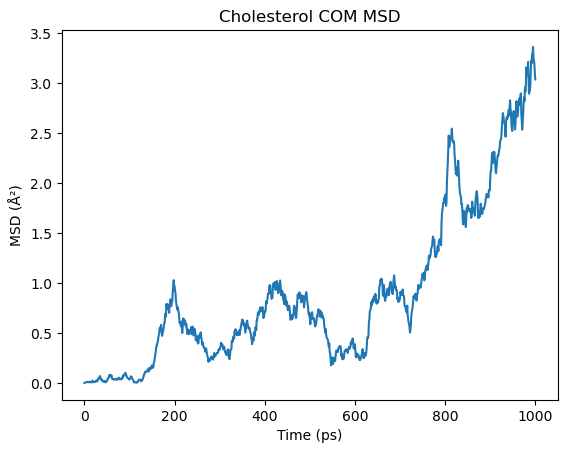

In [11]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

u = mda.Universe("full_1.lammpstrj", format="LAMMPSDUMP")

# Group by residue ID (assuming one cholesterol per resid)
chol_group = [res for res in u.select_atoms("type 1").residues]

n_frames = len(u.trajectory)
n_chol = len(chol_group)
msd = np.zeros(n_frames)

# Store initial COMs
initial_coms = np.array([res.atoms.center_of_mass() for res in chol_group])

for i, ts in enumerate(tqdm(u.trajectory, desc="Computing MSD")):
    current_coms = np.array([res.atoms.center_of_mass() for res in chol_group])
    displacements = current_coms - initial_coms
    squared_disp = np.sum(displacements**2, axis=1)
    msd[i] = np.mean(squared_disp)

times = np.arange(n_frames) * u.trajectory.dt  # time in ps (if dt is set correctly)

plt.plot(times, msd)
plt.xlabel("Time (ps)")
plt.ylabel("MSD (Å²)")
plt.title("Cholesterol COM MSD")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import align, pca
import warnings
warnings.filterwarnings('ignore')

# Load your trajectory
u = mda.Universe("full_1.lammptrj", format="LAMMPSDUMP")

# Select something meaningful, e.g., cholesterol atoms
# You can also try 'name P*' or other atom names for lipids
sel = u.select_atoms("type 1")  # cholesterol, as you said

# Align trajectory to the first frame to remove overall translation/rotation
aligner = align.AlignTraj(u, u, select="type 1", in_memory=True).run()

# Run PCA
pc = pca.PCA(u, select="type 1", align=True).run()

# Variance info
print("Explained variance by first 3 PCs:")
for i in range(3):
    print(f"PC{i+1}: {pc.variance[i]:.2f}, Cumulated: {pc.cumulated_variance[i]:.3f}")

# Plot cumulative variance
plt.plot(pc.cumulated_variance[:10], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance by PCs')
plt.show()

# Transform into PC space
transformed = pc.transform(sel, n_components=3)

# Package into DataFrame
df = pd.DataFrame(transformed, columns=[f"PC{i+1}" for i in range(3)])
df['Time (ps)'] = df.index * u.trajectory.dt

# Plot the first 3 components over time
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(df["Time (ps)"], df[f"PC{i+1}"], label=f"PC{i+1}")
plt.legend()
plt.xlabel("Time (ps)")
plt.ylabel("Projection value")
plt.title("Principal Component Projections Over Time")
plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wehne\AppData\Local\Temp\ipykernel_6152\7876745.py:6: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('msd_1.out', comment='#', sep='\s+', header=None)
C:\Users\wehne\AppData\Local\Temp\ipykernel_6152\7876745.py:27: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('msd_4.out', comment='#', sep='\s+', header=None)
C:\Users\wehne\AppData\Local\Temp\ipykernel_6152\7876745.py:48: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('msd_7.out', comment='#', sep='\s+', header=None)
C:\Users\wehne\AppData\Local\Temp\ipykernel_6152\7876745.p

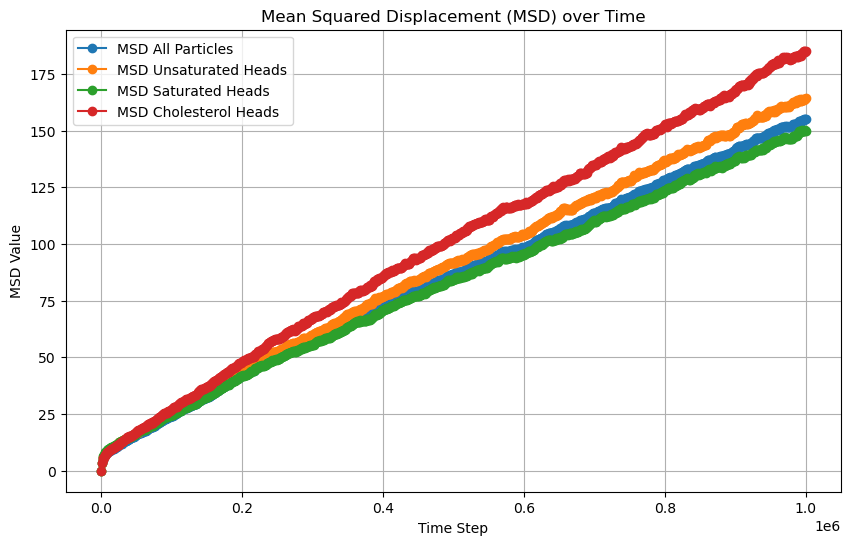

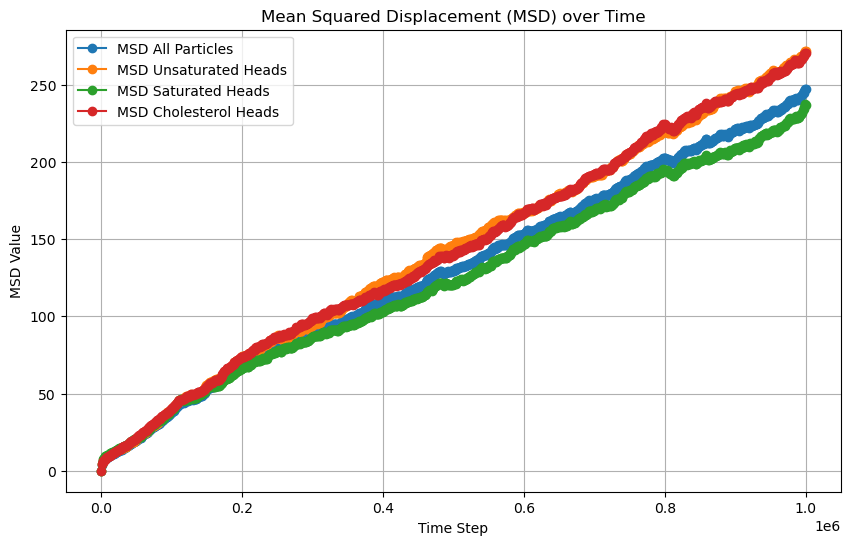

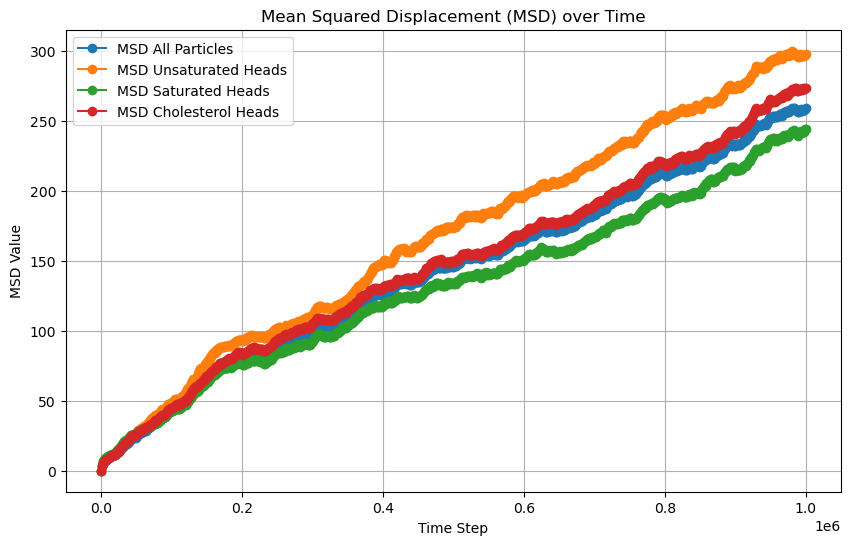

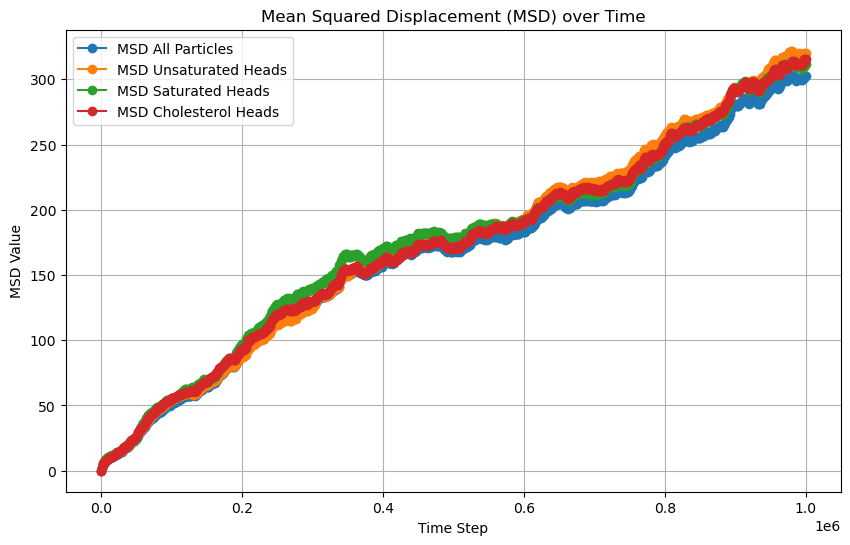

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the msd.out file, skipping comment lines that start with '#'
# and using whitespace as the delimiter.
data = pd.read_csv('msd_1.out', comment='#', sep='\s+', header=None)

# Assign column names based on the file structure.
data.columns = ["TimeStep", "v_msd_all_val", "v_msd_1_val", "v_msd_8_val", "v_msd_9_val"]

# Create a plot for the MSD values.
plt.figure(figsize=(10, 6))
plt.plot(data["TimeStep"], data["v_msd_all_val"], label='MSD All Particles', marker='o')
plt.plot(data["TimeStep"], data["v_msd_1_val"], label='MSD Unsaturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_8_val"], label='MSD Saturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_9_val"], label='MSD Cholesterol Heads', marker='o')

plt.xlabel("Time Step")
plt.ylabel("MSD Value")
plt.title("Mean Squared Displacement (MSD) over Time")
plt.legend()
plt.grid(True)
plt.show()

# Read the msd.out file, skipping comment lines that start with '#'
# and using whitespace as the delimiter.
data = pd.read_csv('msd_4.out', comment='#', sep='\s+', header=None)

# Assign column names based on the file structure.
data.columns = ["TimeStep", "v_msd_all_val", "v_msd_1_val", "v_msd_8_val", "v_msd_9_val"]

# Create a plot for the MSD values.
plt.figure(figsize=(10, 6))
plt.plot(data["TimeStep"], data["v_msd_all_val"], label='MSD All Particles', marker='o')
plt.plot(data["TimeStep"], data["v_msd_1_val"], label='MSD Unsaturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_8_val"], label='MSD Saturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_9_val"], label='MSD Cholesterol Heads', marker='o')

plt.xlabel("Time Step")
plt.ylabel("MSD Value")
plt.title("Mean Squared Displacement (MSD) over Time")
plt.legend()
plt.grid(True)
plt.show()

# Read the msd.out file, skipping comment lines that start with '#'
# and using whitespace as the delimiter.
data = pd.read_csv('msd_7.out', comment='#', sep='\s+', header=None)

# Assign column names based on the file structure.
data.columns = ["TimeStep", "v_msd_all_val", "v_msd_1_val", "v_msd_8_val", "v_msd_9_val"]

# Create a plot for the MSD values.
plt.figure(figsize=(10, 6))
plt.plot(data["TimeStep"], data["v_msd_all_val"], label='MSD All Particles', marker='o')
plt.plot(data["TimeStep"], data["v_msd_1_val"], label='MSD Unsaturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_8_val"], label='MSD Saturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_9_val"], label='MSD Cholesterol Heads', marker='o')

plt.xlabel("Time Step")
plt.ylabel("MSD Value")
plt.title("Mean Squared Displacement (MSD) over Time")
plt.legend()
plt.grid(True)
plt.show()

# Read the msd.out file, skipping comment lines that start with '#'
# and using whitespace as the delimiter.
data = pd.read_csv('msd_10.out', comment='#', sep='\s+', header=None)

# Assign column names based on the file structure.
data.columns = ["TimeStep", "v_msd_all_val", "v_msd_1_val", "v_msd_8_val", "v_msd_9_val"]

# Create a plot for the MSD values.
plt.figure(figsize=(10, 6))
plt.plot(data["TimeStep"], data["v_msd_all_val"], label='MSD All Particles', marker='o')
plt.plot(data["TimeStep"], data["v_msd_1_val"], label='MSD Unsaturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_8_val"], label='MSD Saturated Heads', marker='o')
plt.plot(data["TimeStep"], data["v_msd_9_val"], label='MSD Cholesterol Heads', marker='o')

plt.xlabel("Time Step")
plt.ylabel("MSD Value")
plt.title("Mean Squared Displacement (MSD) over Time")
plt.legend()
plt.grid(True)
plt.show()


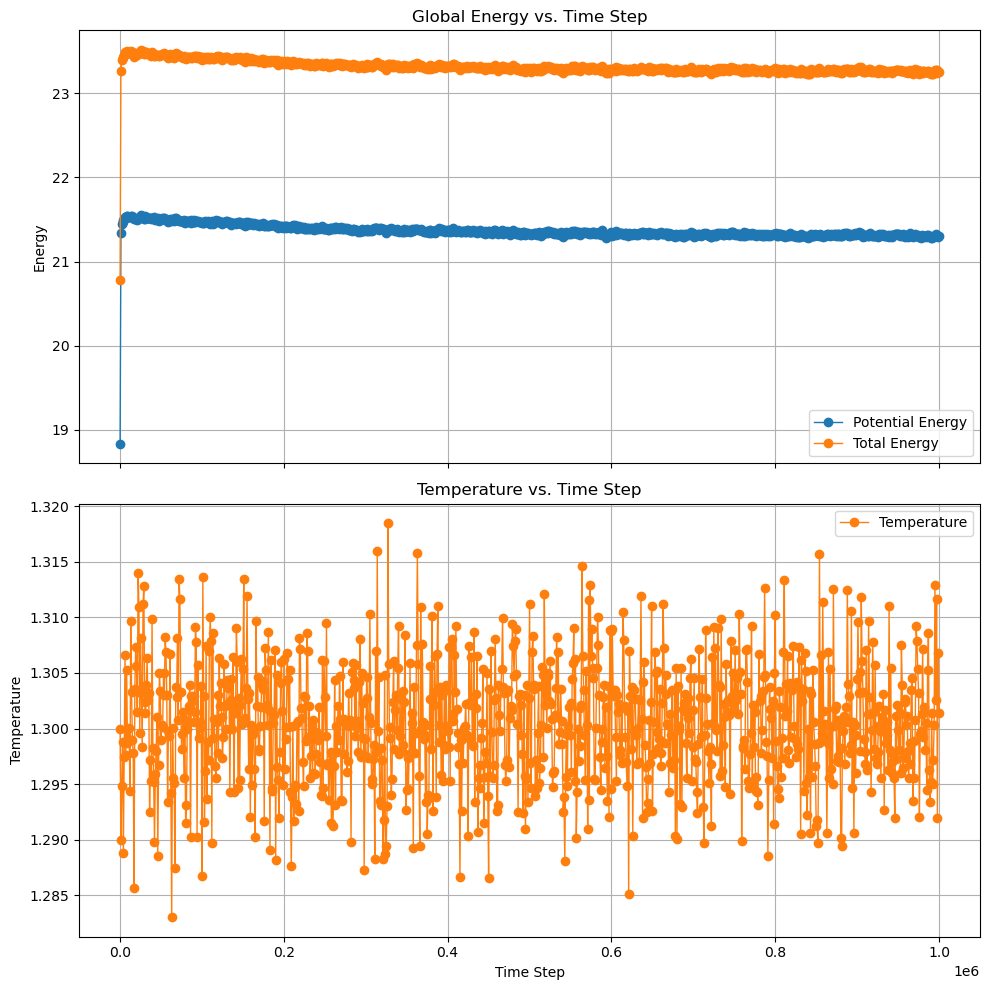

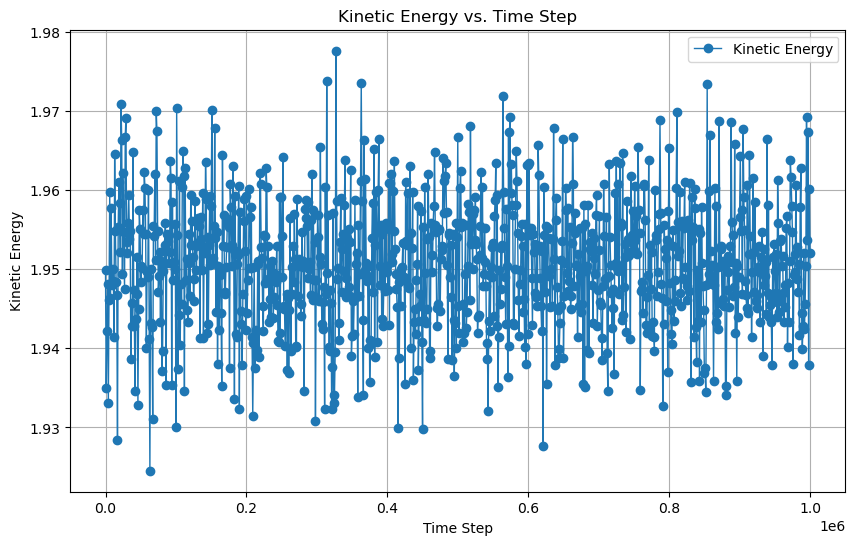

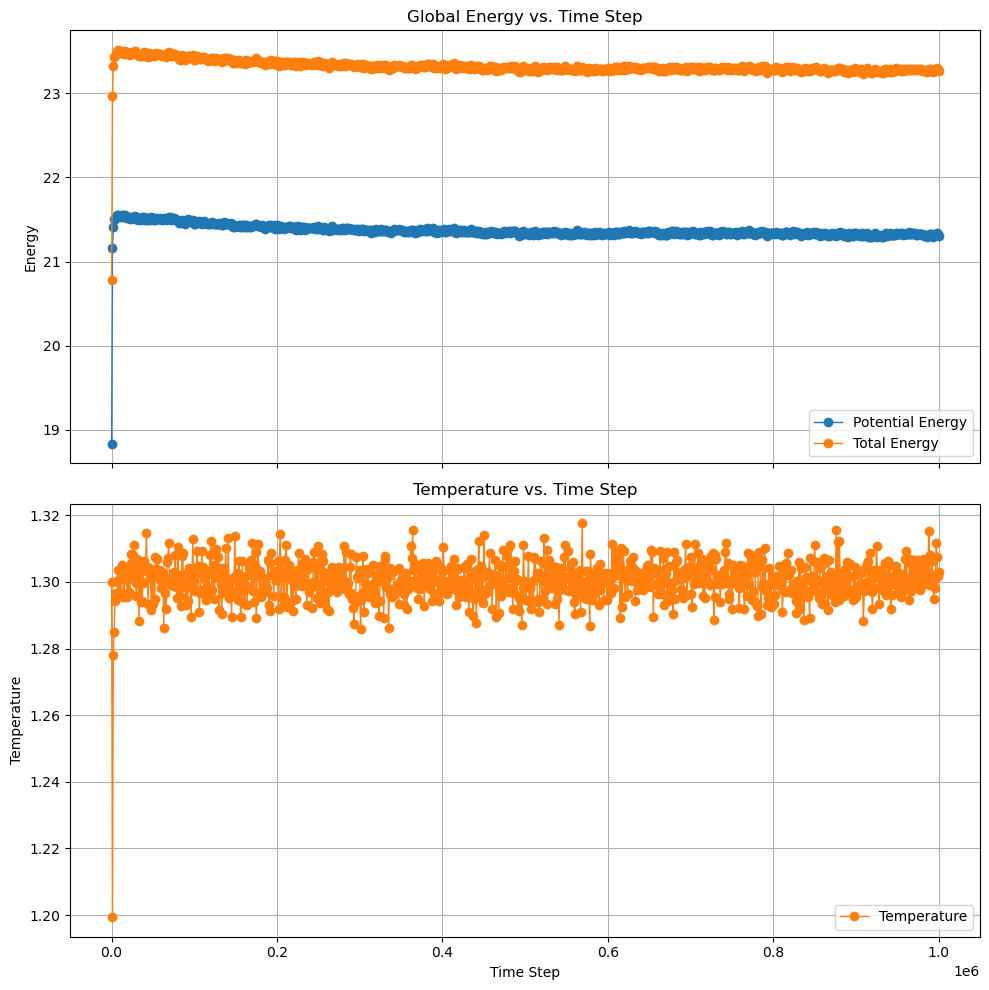

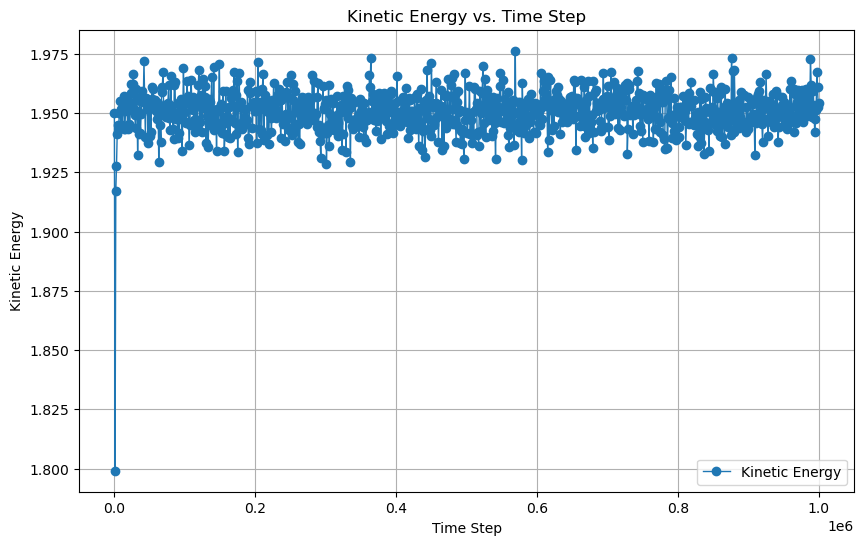

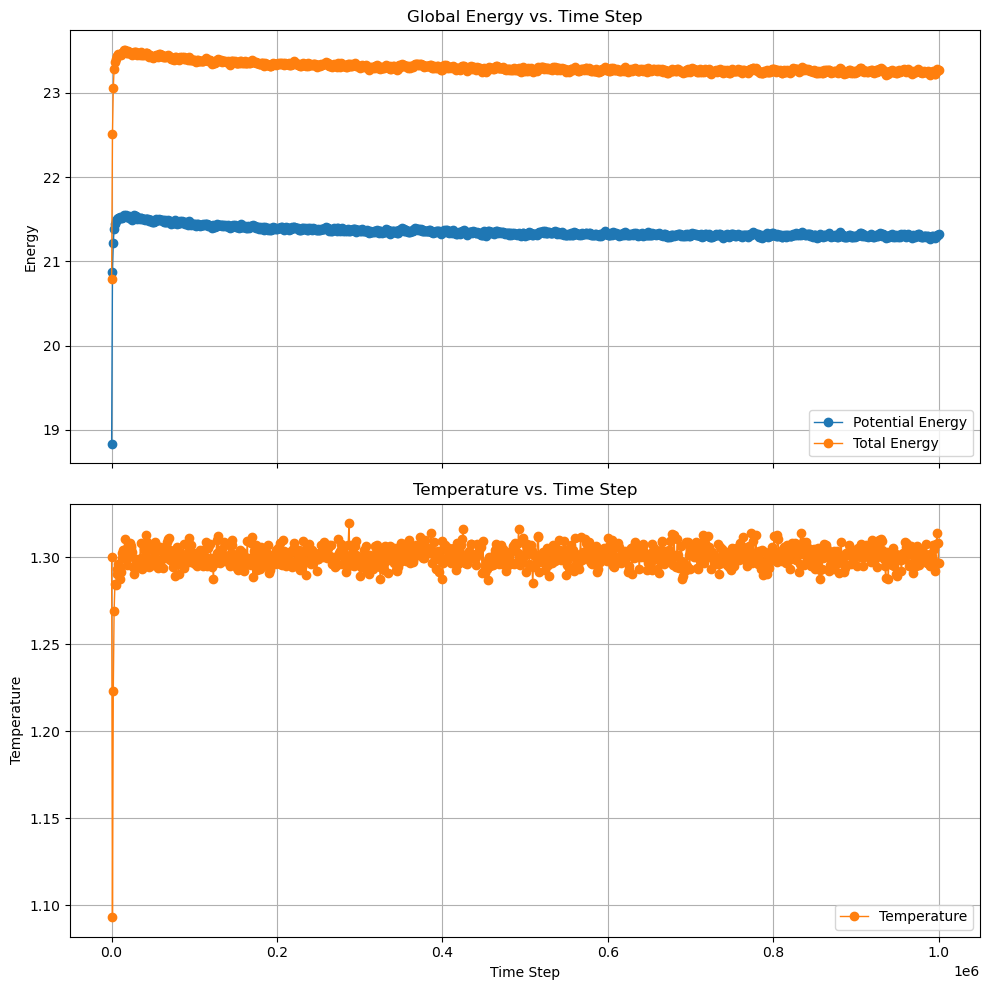

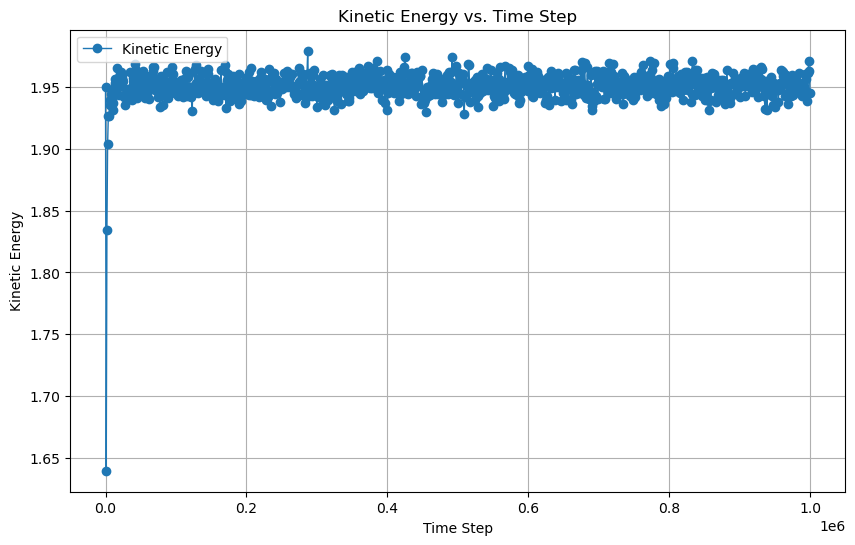

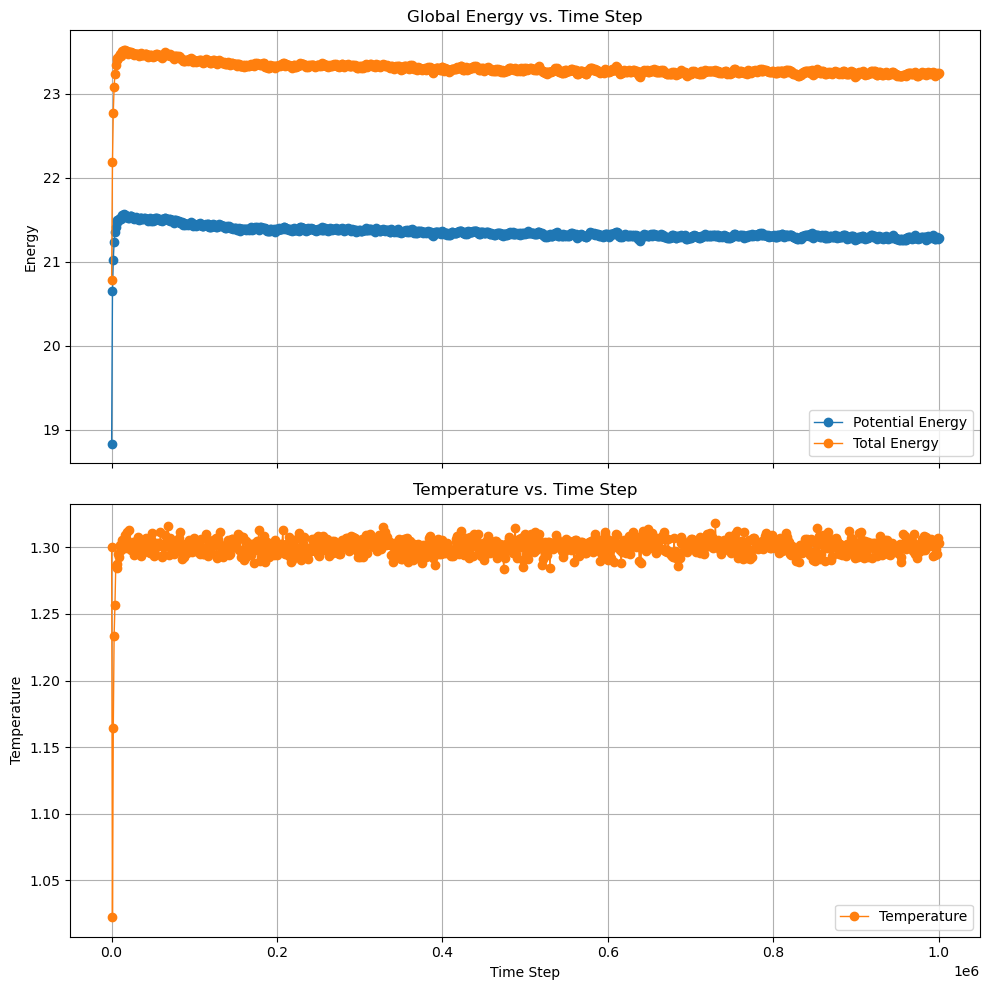

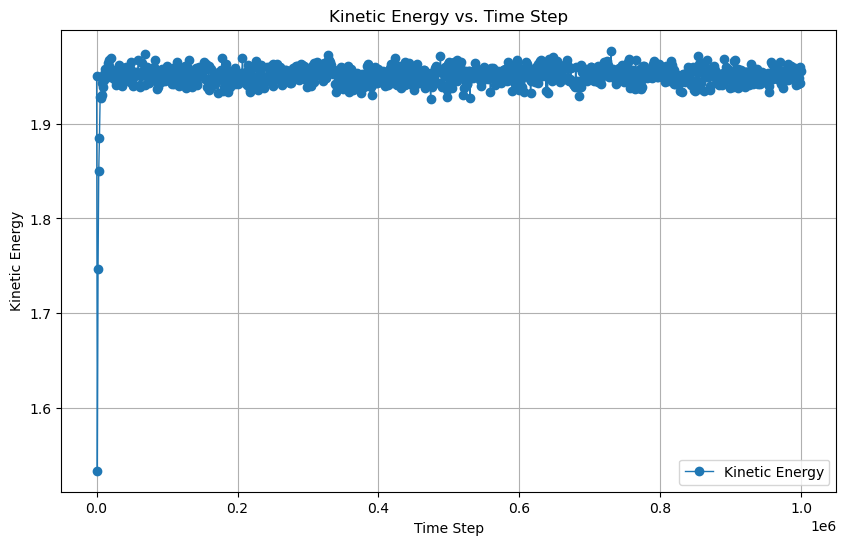

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize empty lists to store values
steps = []
ke = []
pe = []
tot = []
temp = []

# Open and parse the global.out file
with open("global_1.out", "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue
        # The line is structured as:
        # "Step:" 0  "KE:" 1.64995875  "PE:" 30.8165775459587  "Tot:" 32.4665362959587  "Temp:" 1.1
        tokens = line.split()
        # Extract the values based on their positions in the line
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))
        pe.append(float(tokens[5]))
        tot.append(float(tokens[7]))
        temp.append(float(tokens[9]))

# Create a DataFrame from the parsed data
df = pd.DataFrame({
    "Step": steps,
    "KE": ke,
    "PE": pe,
    "Tot": tot,
    "Temp": temp
})

# Create subplots: one for energies and one for temperature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot energies on the first subplot
#ax1.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["PE"], label="Potential Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["Tot"], label="Total Energy", marker='o', linewidth=1)
ax1.set_ylabel("Energy")
ax1.set_title("Global Energy vs. Time Step")
ax1.legend()
ax1.grid(True)

# Plot temperature on the second subplot
ax2.plot(df["Step"], df["Temp"], label="Temperature", marker='o', linewidth=1, color="tab:orange")
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Temperature")
ax2.set_title("Temperature vs. Time Step")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

steps = []
ke = []

# Open and parse the global.out file
with open("global_1.out", "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        tokens = line.split()
        # tokens[1] contains the step value and tokens[3] the kinetic energy
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))

# Create a DataFrame (optional but useful for further analysis)
df = pd.DataFrame({
    "Step": steps,
    "KE": ke
})

# Plot kinetic energy on its own figure
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
plt.xlabel("Time Step")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy vs. Time Step")
plt.legend()
plt.grid(True)
plt.show()










# Initialize empty lists to store values
steps = []
ke = []
pe = []
tot = []
temp = []

# Open and parse the global.out file
with open("global_4.out", "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue
        # The line is structured as:
        # "Step:" 0  "KE:" 1.64995875  "PE:" 30.8165775459587  "Tot:" 32.4665362959587  "Temp:" 1.1
        tokens = line.split()
        # Extract the values based on their positions in the line
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))
        pe.append(float(tokens[5]))
        tot.append(float(tokens[7]))
        temp.append(float(tokens[9]))

# Create a DataFrame from the parsed data
df = pd.DataFrame({
    "Step": steps,
    "KE": ke,
    "PE": pe,
    "Tot": tot,
    "Temp": temp
})

# Create subplots: one for energies and one for temperature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot energies on the first subplot
#ax1.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["PE"], label="Potential Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["Tot"], label="Total Energy", marker='o', linewidth=1)
ax1.set_ylabel("Energy")
ax1.set_title("Global Energy vs. Time Step")
ax1.legend()
ax1.grid(True)

# Plot temperature on the second subplot
ax2.plot(df["Step"], df["Temp"], label="Temperature", marker='o', linewidth=1, color="tab:orange")
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Temperature")
ax2.set_title("Temperature vs. Time Step")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

steps = []
ke = []

# Open and parse the global.out file
with open("global_4.out", "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        tokens = line.split()
        # tokens[1] contains the step value and tokens[3] the kinetic energy
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))

# Create a DataFrame (optional but useful for further analysis)
df = pd.DataFrame({
    "Step": steps,
    "KE": ke
})

# Plot kinetic energy on its own figure
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
plt.xlabel("Time Step")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy vs. Time Step")
plt.legend()
plt.grid(True)
plt.show()









# Initialize empty lists to store values
steps = []
ke = []
pe = []
tot = []
temp = []

# Open and parse the global.out file
with open("global_7.out", "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue
        # The line is structured as:
        # "Step:" 0  "KE:" 1.64995875  "PE:" 30.8165775459587  "Tot:" 32.4665362959587  "Temp:" 1.1
        tokens = line.split()
        # Extract the values based on their positions in the line
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))
        pe.append(float(tokens[5]))
        tot.append(float(tokens[7]))
        temp.append(float(tokens[9]))

# Create a DataFrame from the parsed data
df = pd.DataFrame({
    "Step": steps,
    "KE": ke,
    "PE": pe,
    "Tot": tot,
    "Temp": temp
})

# Create subplots: one for energies and one for temperature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot energies on the first subplot
#ax1.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["PE"], label="Potential Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["Tot"], label="Total Energy", marker='o', linewidth=1)
ax1.set_ylabel("Energy")
ax1.set_title("Global Energy vs. Time Step")
ax1.legend()
ax1.grid(True)

# Plot temperature on the second subplot
ax2.plot(df["Step"], df["Temp"], label="Temperature", marker='o', linewidth=1, color="tab:orange")
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Temperature")
ax2.set_title("Temperature vs. Time Step")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

steps = []
ke = []

# Open and parse the global.out file
with open("global_7.out", "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        tokens = line.split()
        # tokens[1] contains the step value and tokens[3] the kinetic energy
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))

# Create a DataFrame (optional but useful for further analysis)
df = pd.DataFrame({
    "Step": steps,
    "KE": ke
})

# Plot kinetic energy on its own figure
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
plt.xlabel("Time Step")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy vs. Time Step")
plt.legend()
plt.grid(True)
plt.show()










# Initialize empty lists to store values
steps = []
ke = []
pe = []
tot = []
temp = []

# Open and parse the global.out file
with open("global_10.out", "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue
        # The line is structured as:
        # "Step:" 0  "KE:" 1.64995875  "PE:" 30.8165775459587  "Tot:" 32.4665362959587  "Temp:" 1.1
        tokens = line.split()
        # Extract the values based on their positions in the line
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))
        pe.append(float(tokens[5]))
        tot.append(float(tokens[7]))
        temp.append(float(tokens[9]))

# Create a DataFrame from the parsed data
df = pd.DataFrame({
    "Step": steps,
    "KE": ke,
    "PE": pe,
    "Tot": tot,
    "Temp": temp
})

# Create subplots: one for energies and one for temperature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot energies on the first subplot
#ax1.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["PE"], label="Potential Energy", marker='o', linewidth=1)
ax1.plot(df["Step"], df["Tot"], label="Total Energy", marker='o', linewidth=1)
ax1.set_ylabel("Energy")
ax1.set_title("Global Energy vs. Time Step")
ax1.legend()
ax1.grid(True)

# Plot temperature on the second subplot
ax2.plot(df["Step"], df["Temp"], label="Temperature", marker='o', linewidth=1, color="tab:orange")
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Temperature")
ax2.set_title("Temperature vs. Time Step")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

steps = []
ke = []

# Open and parse the global.out file
with open("global_10.out", "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        tokens = line.split()
        # tokens[1] contains the step value and tokens[3] the kinetic energy
        steps.append(float(tokens[1]))
        ke.append(float(tokens[3]))

# Create a DataFrame (optional but useful for further analysis)
df = pd.DataFrame({
    "Step": steps,
    "KE": ke
})

# Plot kinetic energy on its own figure
plt.figure(figsize=(10, 6))
plt.plot(df["Step"], df["KE"], label="Kinetic Energy", marker='o', linewidth=1)
plt.xlabel("Time Step")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy vs. Time Step")
plt.legend()
plt.grid(True)
plt.show()




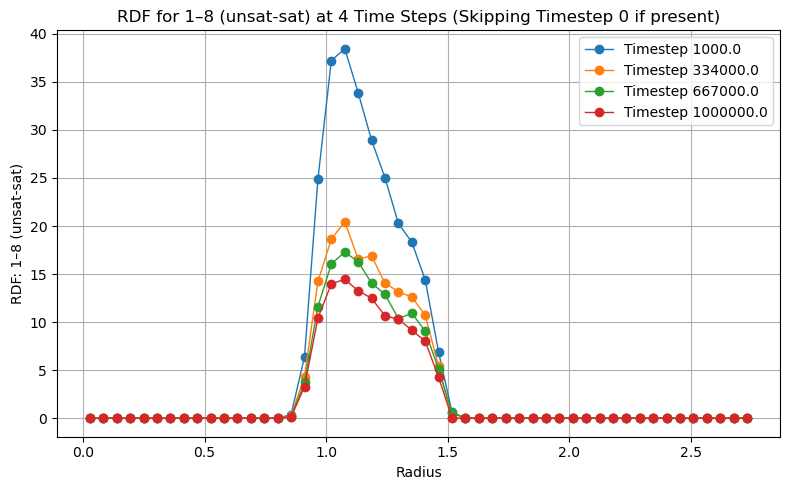

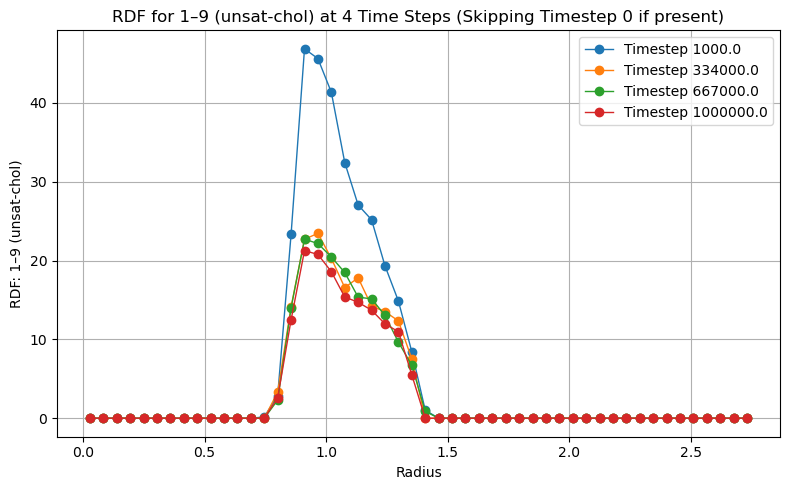

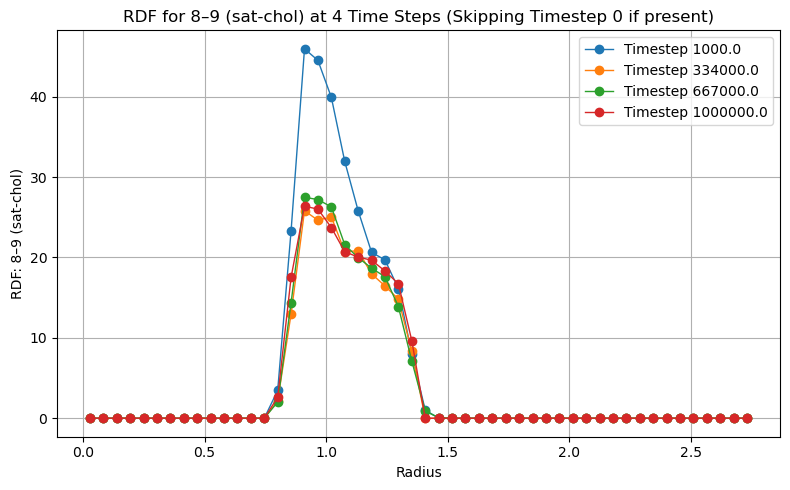

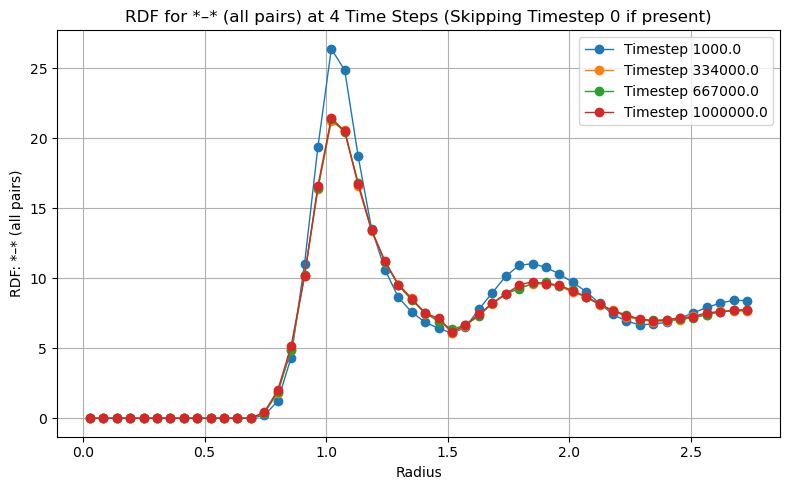

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def parse_rdf_file(filename):
    """
    Parse the rdf.out file into blocks.
    
    Each block starts with a header line: "TimeStep Number-of-rows"
    followed by that many data rows. Each data row is expected to contain 10 numbers:
      1)  The row index (added by fix ave/time),
      2)  The radial distance (bin center),
      3)  g(r) for pair #1,
      4)  coordination for pair #1,
      5)  g(r) for pair #2,
      6)  coordination for pair #2,
      7)  g(r) for pair #3,
      8)  coordination for pair #3,
      9)  g(r) for pair #4,
      10) coordination for pair #4.
    
    The columns are renamed as:
      ["index", "radius", "g(r1)", "c(1)", "g(r2)", "c(2)", "g(r3)", "c(3)", "g(r4)", "c(4)"]
    
    Returns:
      A dictionary mapping timestep (float) -> pandas DataFrame (one block per timestep).
    """
    blocks = {}
    with open(filename, "r") as f:
        lines = f.readlines()
        
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        # Skip empty or comment lines
        if not line or line.startswith("#"):
            i += 1
            continue
        
        tokens = line.split()
        # Identify a block header: should have exactly 2 tokens (TimeStep and Number-of-rows)
        if len(tokens) == 2:
            timestep = float(tokens[0])
            nrows = int(tokens[1])
            i += 1  # move to the data rows
            block_data = []
            for _ in range(nrows):
                if i >= len(lines):
                    break
                row_line = lines[i].strip()
                if row_line:
                    # Convert each token in the row to float
                    row_data = [float(tok) for tok in row_line.split()]
                    block_data.append(row_data)
                i += 1
            
            # Set column names
            col_names = ["index", "radius", 
                         "g(r1)", "c(1)", 
                         "g(r2)", "c(2)", 
                         "g(r3)", "c(3)", 
                         "g(r4)", "c(4)"]
            df_block = pd.DataFrame(block_data, columns=col_names)
            blocks[timestep] = df_block
        else:
            i += 1
    return blocks

# 1) Parse the file
rdf_blocks = parse_rdf_file("rdf_10.out")

# 2) Sort timesteps
sorted_timesteps = sorted(rdf_blocks.keys())
nblocks = len(sorted_timesteps)

# 3) Pick 4 time steps, skipping timestep 0 if it exists
if nblocks >= 5:
    # Skip the very first block (often 0.0), then pick evenly spaced from the remainder
    indices = [1, (nblocks-1)//3 + 1, 2*(nblocks-1)//3 + 1, nblocks-1]
elif nblocks >= 4:
    indices = [1, nblocks//3, 2*nblocks//3, nblocks-1]
else:
    # If fewer than 4 blocks, just use them all
    indices = list(range(nblocks))

selected_timesteps = [sorted_timesteps[i] for i in indices]

# 4) Define the four pairs and their g(r) columns
pairs = [
    ("g(r1)", "1–8 (unsat-sat)"),
    ("g(r2)", "1–9 (unsat-chol)"),
    ("g(r3)", "8–9 (sat-chol)"),
    ("g(r4)", "*–* (all pairs)")
]

# 5) Create four separate figures, one for each pair
for g_col, pair_label in pairs:
    plt.figure(figsize=(8, 5))
    for ts in selected_timesteps:
        df_block = rdf_blocks[ts]
        # Plot the RDF for this pair at this timestep
        plt.plot(
            df_block["radius"], df_block[g_col],
            marker='o', linewidth=1,
            label=f"Timestep {ts}"
        )
    
    plt.xlabel("Radius")
    plt.ylabel(f"RDF: {pair_label}")
    plt.title(f"RDF for {pair_label} at 4 Time Steps (Skipping Timestep 0 if present)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


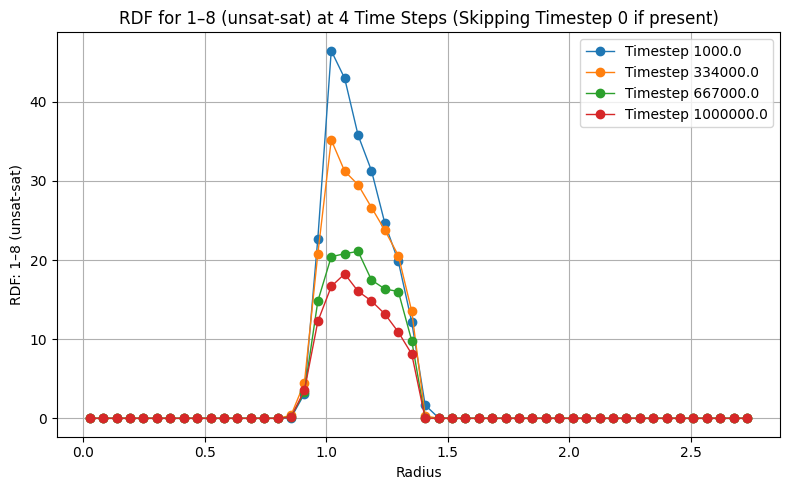

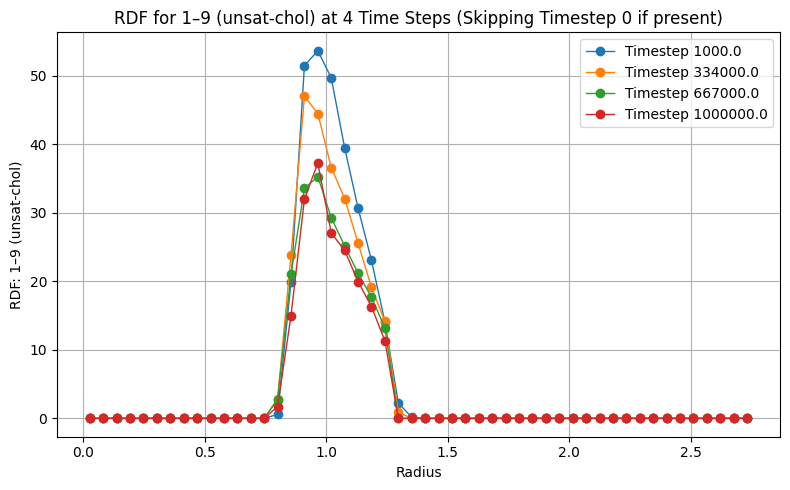

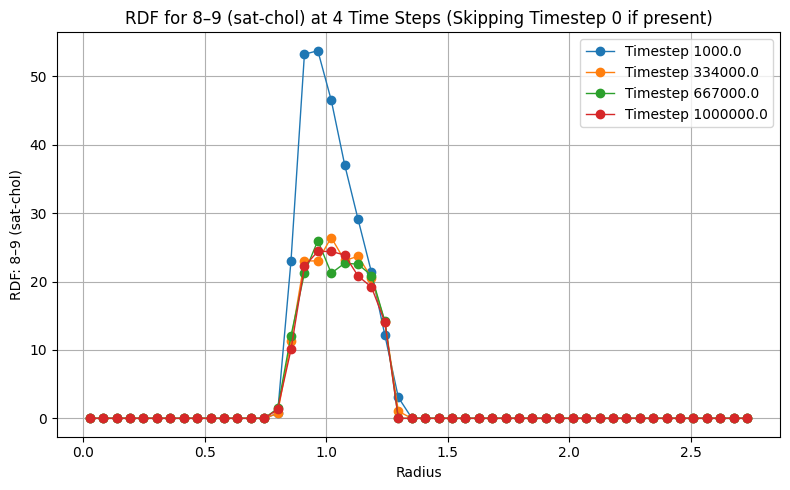

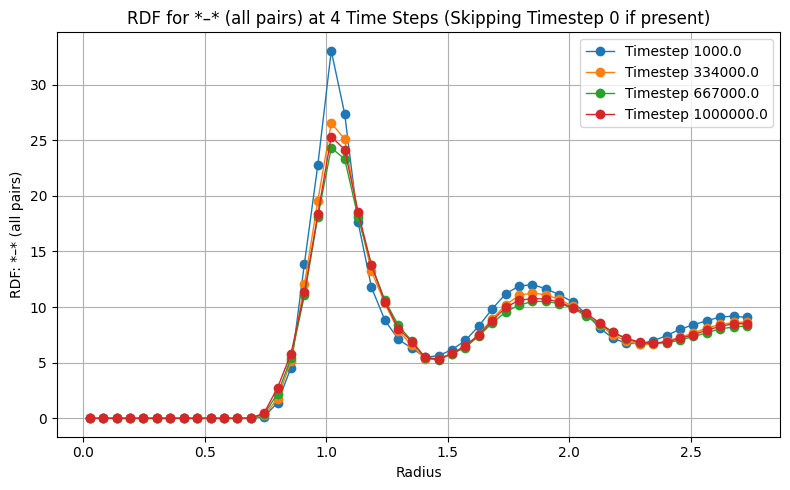

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def parse_rdf_file(filename):
    """
    Parse the rdf.out file into blocks.
    
    Each block starts with a header line: "TimeStep Number-of-rows"
    followed by that many data rows. Each data row is expected to contain 10 numbers:
      1)  The row index (added by fix ave/time),
      2)  The radial distance (bin center),
      3)  g(r) for pair #1,
      4)  coordination for pair #1,
      5)  g(r) for pair #2,
      6)  coordination for pair #2,
      7)  g(r) for pair #3,
      8)  coordination for pair #3,
      9)  g(r) for pair #4,
      10) coordination for pair #4.
    
    The columns are renamed as:
      ["index", "radius", "g(r1)", "c(1)", "g(r2)", "c(2)", "g(r3)", "c(3)", "g(r4)", "c(4)"]
    
    Returns:
      A dictionary mapping timestep (float) -> pandas DataFrame (one block per timestep).
    """
    blocks = {}
    with open(filename, "r") as f:
        lines = f.readlines()
        
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        # Skip empty or comment lines
        if not line or line.startswith("#"):
            i += 1
            continue
        
        tokens = line.split()
        # Identify a block header: should have exactly 2 tokens (TimeStep and Number-of-rows)
        if len(tokens) == 2:
            timestep = float(tokens[0])
            nrows = int(tokens[1])
            i += 1  # move to the data rows
            block_data = []
            for _ in range(nrows):
                if i >= len(lines):
                    break
                row_line = lines[i].strip()
                if row_line:
                    # Convert each token in the row to float
                    row_data = [float(tok) for tok in row_line.split()]
                    block_data.append(row_data)
                i += 1
            
            # Set column names
            col_names = ["index", "radius", 
                         "g(r1)", "c(1)", 
                         "g(r2)", "c(2)", 
                         "g(r3)", "c(3)", 
                         "g(r4)", "c(4)"]
            df_block = pd.DataFrame(block_data, columns=col_names)
            blocks[timestep] = df_block
        else:
            i += 1
    return blocks

# 1) Parse the file
rdf_blocks = parse_rdf_file("rdf_adapt.out")

# 2) Sort timesteps
sorted_timesteps = sorted(rdf_blocks.keys())
nblocks = len(sorted_timesteps)

# 3) Pick 4 time steps, skipping timestep 0 if it exists
if nblocks >= 5:
    # Skip the very first block (often 0.0), then pick evenly spaced from the remainder
    indices = [1, (nblocks-1)//3 + 1, 2*(nblocks-1)//3 + 1, nblocks-1]
elif nblocks >= 4:
    indices = [1, nblocks//3, 2*nblocks//3, nblocks-1]
else:
    # If fewer than 4 blocks, just use them all
    indices = list(range(nblocks))

selected_timesteps = [sorted_timesteps[i] for i in indices]

# 4) Define the four pairs and their g(r) columns
pairs = [
    ("g(r1)", "1–8 (unsat-sat)"),
    ("g(r2)", "1–9 (unsat-chol)"),
    ("g(r3)", "8–9 (sat-chol)"),
    ("g(r4)", "*–* (all pairs)")
]

# 5) Create four separate figures, one for each pair
for g_col, pair_label in pairs:
    plt.figure(figsize=(8, 5))
    for ts in selected_timesteps:
        df_block = rdf_blocks[ts]
        # Plot the RDF for this pair at this timestep
        plt.plot(
            df_block["radius"], df_block[g_col],
            marker='o', linewidth=1,
            label=f"Timestep {ts}"
        )
    
    plt.xlabel("Radius")
    plt.ylabel(f"RDF: {pair_label}")
    plt.title(f"RDF for {pair_label} at 4 Time Steps (Skipping Timestep 0 if present)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


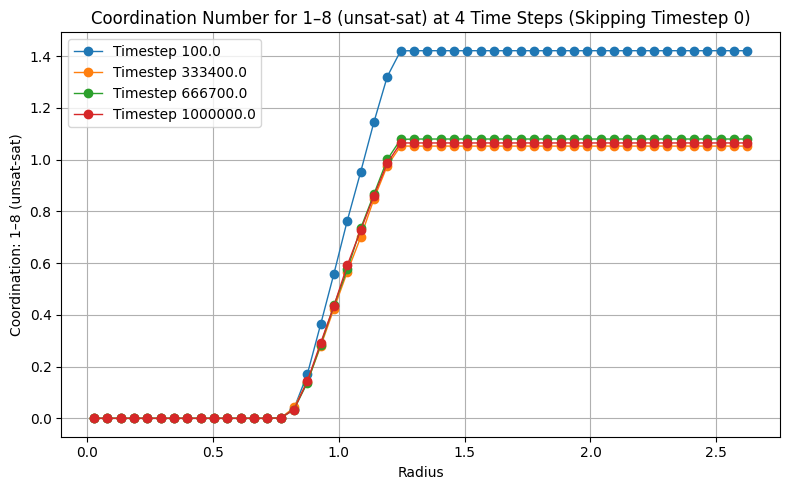

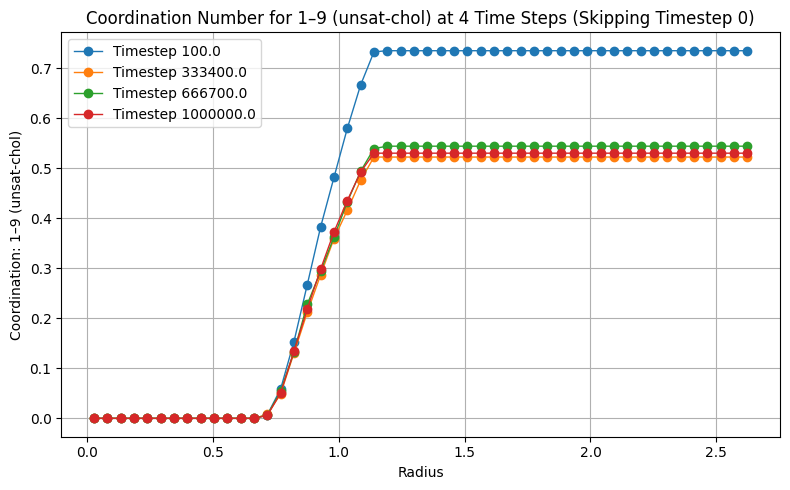

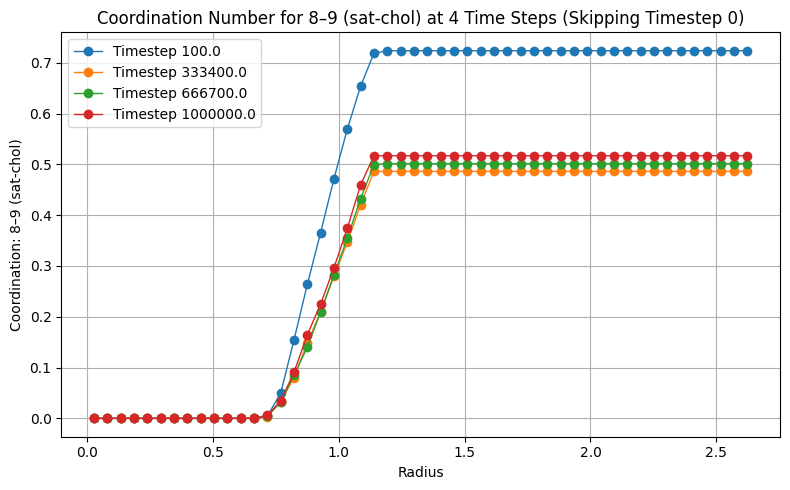

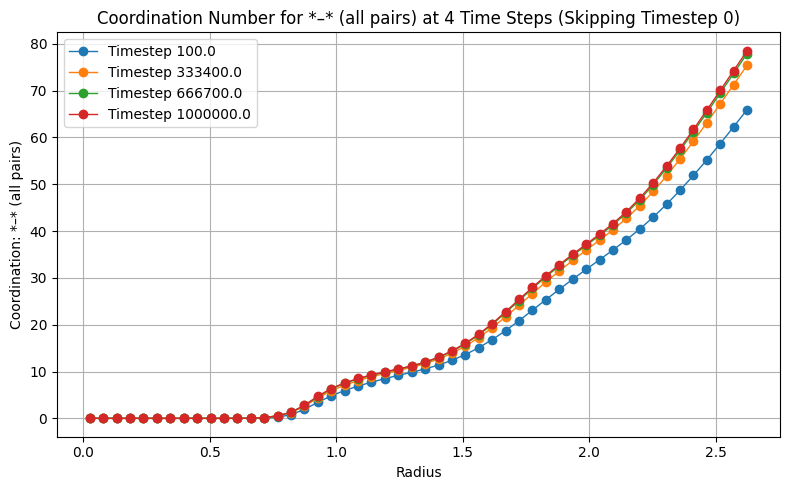

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def parse_rdf_file(filename):
    """
    Parse the rdf.out file into blocks.
    
    Each block starts with a header line: "TimeStep Number-of-rows"
    followed by that many data rows. Each data row is expected to contain 10 numbers:
      1)  The row index (added by fix ave/time),
      2)  The radial distance (bin center),
      3)  g(r) for pair #1,
      4)  coordination for pair #1,
      5)  g(r) for pair #2,
      6)  coordination for pair #2,
      7)  g(r) for pair #3,
      8)  coordination for pair #3,
      9)  g(r) for pair #4,
      10) coordination for pair #4.
    
    The columns are renamed as:
      ["index", "radius", "g(r1)", "c(1)", "g(r2)", "c(2)", "g(r3)", "c(3)", "g(r4)", "c(4)"]
    
    Returns:
      A dictionary mapping timestep (float) -> pandas DataFrame (one block per timestep).
    """
    blocks = {}
    with open(filename, "r") as f:
        lines = f.readlines()
        
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        # Skip empty or comment lines
        if not line or line.startswith("#"):
            i += 1
            continue
        
        tokens = line.split()
        # Identify a block header: should have exactly 2 tokens (TimeStep and Number-of-rows)
        if len(tokens) == 2:
            timestep = float(tokens[0])
            nrows = int(tokens[1])
            i += 1  # move to the data rows
            block_data = []
            for _ in range(nrows):
                if i >= len(lines):
                    break
                row_line = lines[i].strip()
                if row_line:
                    # Convert each token in the row to float
                    row_data = [float(tok) for tok in row_line.split()]
                    block_data.append(row_data)
                i += 1
            
            # Set column names
            col_names = ["index", "radius", 
                         "g(r1)", "c(1)", 
                         "g(r2)", "c(2)", 
                         "g(r3)", "c(3)", 
                         "g(r4)", "c(4)"]
            df_block = pd.DataFrame(block_data, columns=col_names)
            blocks[timestep] = df_block
        else:
            i += 1
    return blocks

# Parse the rdf.out file
rdf_blocks = parse_rdf_file("rdf.out")

# Sort timesteps and select 4 time steps (skipping the 0 timestep if it exists)
sorted_timesteps = sorted(rdf_blocks.keys())
nblocks = len(sorted_timesteps)
if nblocks >= 5:
    # Skip the very first block (often 0.0), then choose evenly spaced blocks from the remainder
    indices = [1, (nblocks-1)//3 + 1, 2*(nblocks-1)//3 + 1, nblocks-1]
elif nblocks >= 4:
    indices = [1, nblocks//3, 2*nblocks//3, nblocks-1]
else:
    indices = list(range(nblocks))

selected_timesteps = [sorted_timesteps[i] for i in indices]

# Define the four pairs for coordination numbers.
# The coordination columns are "c(1)", "c(2)", "c(3)", "c(4)"
pair_labels = [
    ("c(1)", "1–8 (unsat-sat)"),
    ("c(2)", "1–9 (unsat-chol)"),
    ("c(3)", "8–9 (sat-chol)"),
    ("c(4)", "*–* (all pairs)")
]

# Create four separate figures (one for each pair)
for c_col, pair_label in pair_labels:
    plt.figure(figsize=(8, 5))
    for ts in selected_timesteps:
        df_block = rdf_blocks[ts]
        plt.plot(df_block["radius"], df_block[c_col], marker='o', linewidth=1,
                 label=f"Timestep {ts}")
    
    plt.xlabel("Radius")
    plt.ylabel(f"Coordination: {pair_label}")
    plt.title(f"Coordination Number for {pair_label} at 4 Time Steps (Skipping Timestep 0)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


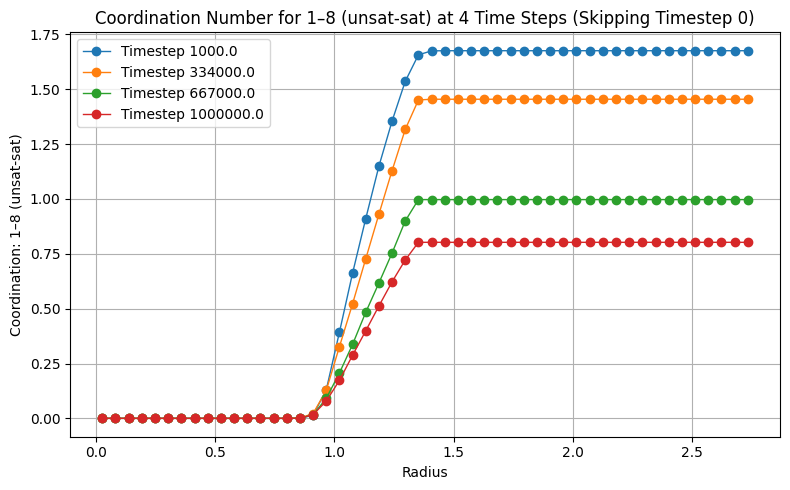

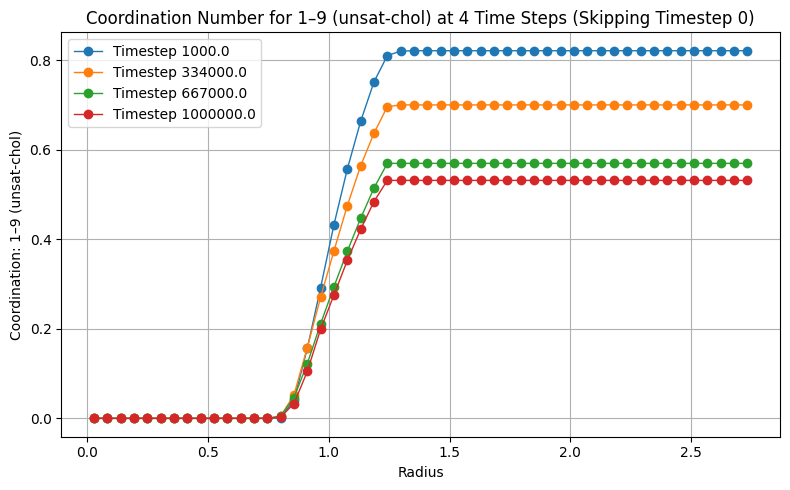

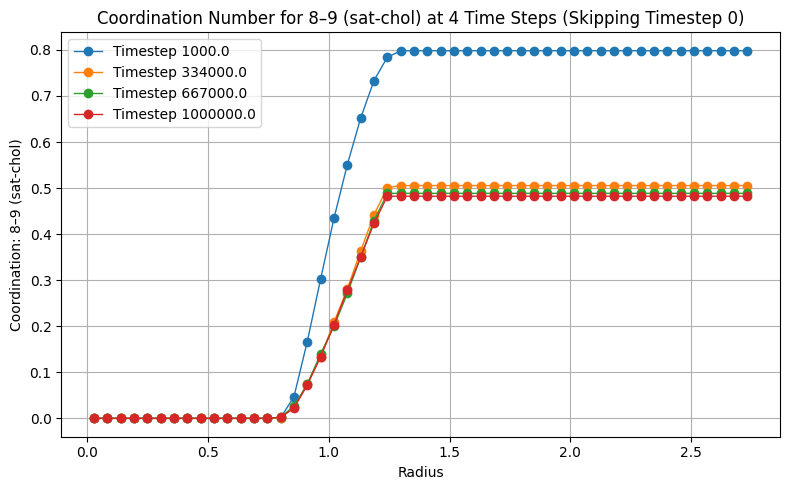

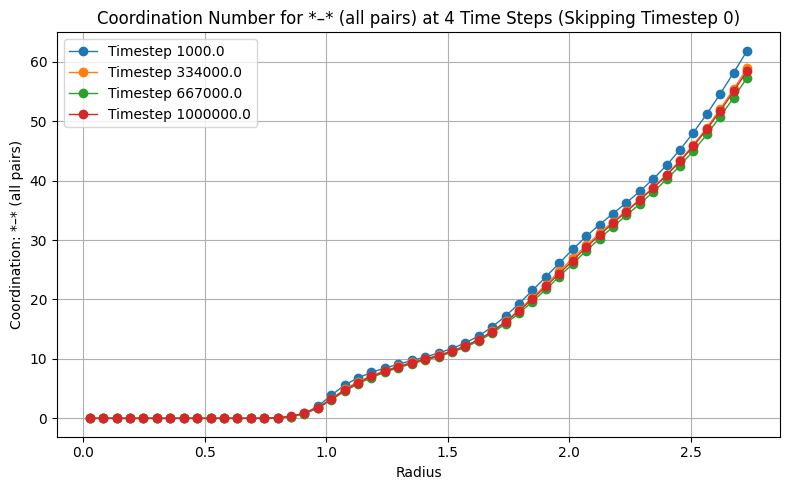

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def parse_rdf_file(filename):
    """
    Parse the rdf.out file into blocks.
    
    Each block starts with a header line: "TimeStep Number-of-rows"
    followed by that many data rows. Each data row is expected to contain 10 numbers:
      1)  The row index (added by fix ave/time),
      2)  The radial distance (bin center),
      3)  g(r) for pair #1,
      4)  coordination for pair #1,
      5)  g(r) for pair #2,
      6)  coordination for pair #2,
      7)  g(r) for pair #3,
      8)  coordination for pair #3,
      9)  g(r) for pair #4,
      10) coordination for pair #4.
    
    The columns are renamed as:
      ["index", "radius", "g(r1)", "c(1)", "g(r2)", "c(2)", "g(r3)", "c(3)", "g(r4)", "c(4)"]
    
    Returns:
      A dictionary mapping timestep (float) -> pandas DataFrame (one block per timestep).
    """
    blocks = {}
    with open(filename, "r") as f:
        lines = f.readlines()
        
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        # Skip empty or comment lines
        if not line or line.startswith("#"):
            i += 1
            continue
        
        tokens = line.split()
        # Identify a block header: should have exactly 2 tokens (TimeStep and Number-of-rows)
        if len(tokens) == 2:
            timestep = float(tokens[0])
            nrows = int(tokens[1])
            i += 1  # move to the data rows
            block_data = []
            for _ in range(nrows):
                if i >= len(lines):
                    break
                row_line = lines[i].strip()
                if row_line:
                    # Convert each token in the row to float
                    row_data = [float(tok) for tok in row_line.split()]
                    block_data.append(row_data)
                i += 1
            
            # Set column names
            col_names = ["index", "radius", 
                         "g(r1)", "c(1)", 
                         "g(r2)", "c(2)", 
                         "g(r3)", "c(3)", 
                         "g(r4)", "c(4)"]
            df_block = pd.DataFrame(block_data, columns=col_names)
            blocks[timestep] = df_block
        else:
            i += 1
    return blocks

# Parse the rdf.out file
rdf_blocks = parse_rdf_file("rdf_adapt.out")

# Sort timesteps and select 4 time steps (skipping the 0 timestep if it exists)
sorted_timesteps = sorted(rdf_blocks.keys())
nblocks = len(sorted_timesteps)
if nblocks >= 5:
    # Skip the very first block (often 0.0), then choose evenly spaced blocks from the remainder
    indices = [1, (nblocks-1)//3 + 1, 2*(nblocks-1)//3 + 1, nblocks-1]
elif nblocks >= 4:
    indices = [1, nblocks//3, 2*nblocks//3, nblocks-1]
else:
    indices = list(range(nblocks))

selected_timesteps = [sorted_timesteps[i] for i in indices]

# Define the four pairs for coordination numbers.
# The coordination columns are "c(1)", "c(2)", "c(3)", "c(4)"
pair_labels = [
    ("c(1)", "1–8 (unsat-sat)"),
    ("c(2)", "1–9 (unsat-chol)"),
    ("c(3)", "8–9 (sat-chol)"),
    ("c(4)", "*–* (all pairs)")
]

# Create four separate figures (one for each pair)
for c_col, pair_label in pair_labels:
    plt.figure(figsize=(8, 5))
    for ts in selected_timesteps:
        df_block = rdf_blocks[ts]
        plt.plot(df_block["radius"], df_block[c_col], marker='o', linewidth=1,
                 label=f"Timestep {ts}")
    
    plt.xlabel("Radius")
    plt.ylabel(f"Coordination: {pair_label}")
    plt.title(f"Coordination Number for {pair_label} at 4 Time Steps (Skipping Timestep 0)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [6]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load trajectory
u = mda.Universe("system_after_min.data", "full_1.lammpstrj", format="LAMMPSDUMP")

# Box & grid setup
box = u.dimensions[:3]
ngrid = 50
dx, dy, dz = [l / ngrid for l in box]

# Bin particles into 3D grid
def bin_particles(positions, box, ngrid):
    indices = (positions / box[:3] * ngrid).astype(int)
    indices = np.clip(indices, 0, ngrid - 1)
    grid = np.zeros((ngrid, ngrid, ngrid))
    for ix, iy, iz in indices:
        grid[ix, iy, iz] += 1
    return grid

# Select 10 evenly spaced frames
n_frames_to_sample = 10
frame_indices = np.linspace(0, len(u.trajectory) - 1, n_frames_to_sample, dtype=int)

# Plot setup
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
z_slice = ngrid // 2

for ax, i in zip(axes, frame_indices):
    u.trajectory[i]

    red = u.select_atoms("type 1")
    cyan = u.select_atoms("type 8")
    chol = u.select_atoms("type 9")

    red_grid = bin_particles(red.positions, box, ngrid)
    cyan_grid = bin_particles(cyan.positions, box, ngrid)
    chol_grid = bin_particles(chol.positions, box, ngrid)

    # Order parameter
    total = red_grid + cyan_grid + 1e-6
    phi = (cyan_grid - red_grid) / total
    phi_smooth = gaussian_filter(phi, sigma=1)

    # Cholesterol density for overlay
    chol_slice = chol_grid[:, :, z_slice]
    chol_mask = gaussian_filter(chol_slice, sigma=1)

    # Normalize chol mask to [0, 1] for alpha transparency
    chol_alpha = np.clip(chol_mask / np.max(chol_mask), 0, 1)

    # Show order parameter field
    im = ax.imshow(phi_smooth[:, :, z_slice], origin='lower', cmap='seismic', vmin=-1, vmax=1)

    # Overlay cholesterol as transparent green
    ax.imshow(np.zeros_like(chol_alpha), cmap='Greens', alpha=chol_alpha, origin='lower')

    ax.set_title(f"Frame {i}")
    ax.axis('off')

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Order Parameter φ')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.suptitle("Phase Separation with Cholesterol Overlay", fontsize=16, y=1.02)
plt.show()


ModuleNotFoundError: No module named 'MDAnalysis'

/home/tim/anaconda3/envs/MDanalysis/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tim/anaconda3/envs/MDanalysis/lib/python3.13/site-packages/MDAnalysis/coordinates/LAMMPS.py:667: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt
/tmp/ipykernel_806868/1981795433.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


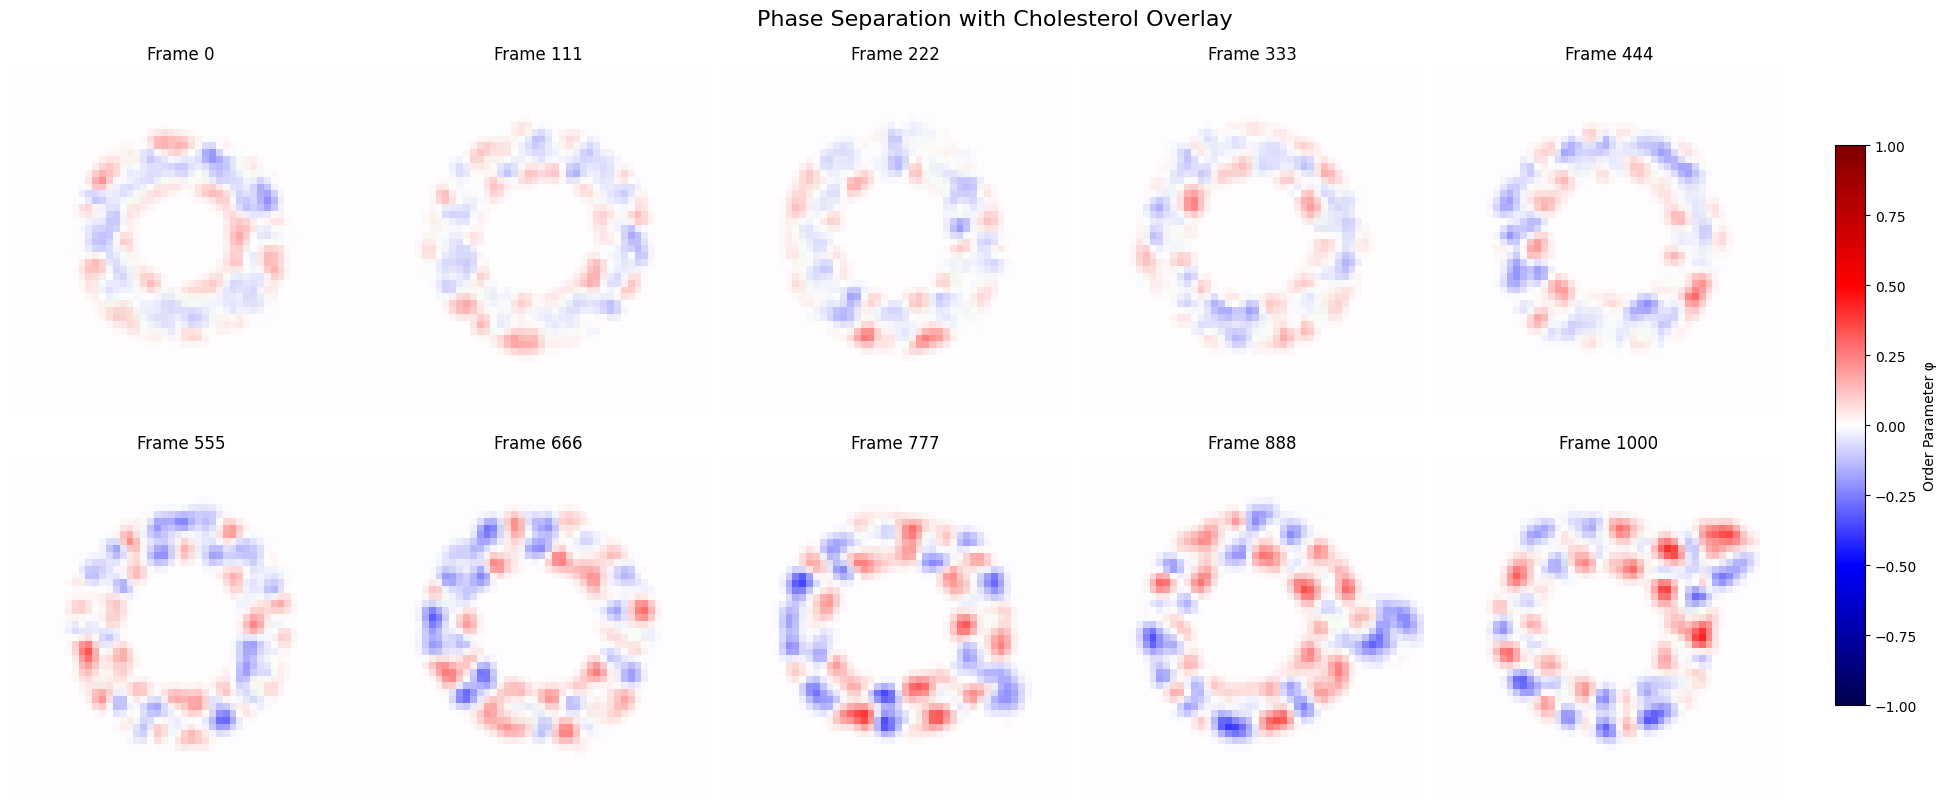

In [10]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load trajectory
u = mda.Universe("system_after_min.data", "full_traj_adapt.lammpstrj", format="LAMMPSDUMP")

# Box & grid setup
box = u.dimensions[:3]
ngrid = 50
dx, dy, dz = [l / ngrid for l in box]

# Bin particles into 3D grid
def bin_particles(positions, box, ngrid):
    indices = (positions / box[:3] * ngrid).astype(int)
    indices = np.clip(indices, 0, ngrid - 1)
    grid = np.zeros((ngrid, ngrid, ngrid))
    for ix, iy, iz in indices:
        grid[ix, iy, iz] += 1
    return grid

# Select 10 evenly spaced frames
n_frames_to_sample = 10
frame_indices = np.linspace(0, len(u.trajectory) - 1, n_frames_to_sample, dtype=int)

# Plot setup
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
z_slice = ngrid // 2

for ax, i in zip(axes, frame_indices):
    u.trajectory[i]

    red = u.select_atoms("type 1")
    cyan = u.select_atoms("type 8")
    chol = u.select_atoms("type 9")

    red_grid = bin_particles(red.positions, box, ngrid)
    cyan_grid = bin_particles(cyan.positions, box, ngrid)
    chol_grid = bin_particles(chol.positions, box, ngrid)

    # Order parameter
    total = red_grid + cyan_grid + 1e-6
    phi = (cyan_grid - red_grid) / total
    phi_smooth = gaussian_filter(phi, sigma=1)

    # Cholesterol density for overlay
    chol_slice = chol_grid[:, :, z_slice]
    chol_mask = gaussian_filter(chol_slice, sigma=1)

    # Normalize chol mask to [0, 1] for alpha transparency
    chol_alpha = np.clip(chol_mask / np.max(chol_mask), 0, 1)

    # Show order parameter field
    im = ax.imshow(phi_smooth[:, :, z_slice], origin='lower', cmap='seismic', vmin=-1, vmax=1)

    # Overlay cholesterol as transparent green
    ax.imshow(np.zeros_like(chol_alpha), cmap='Greens', alpha=chol_alpha, origin='lower')

    ax.set_title(f"Frame {i}")
    ax.axis('off')

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Order Parameter φ')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.suptitle("Phase Separation with Cholesterol Overlay", fontsize=16, y=1.02)
plt.show()


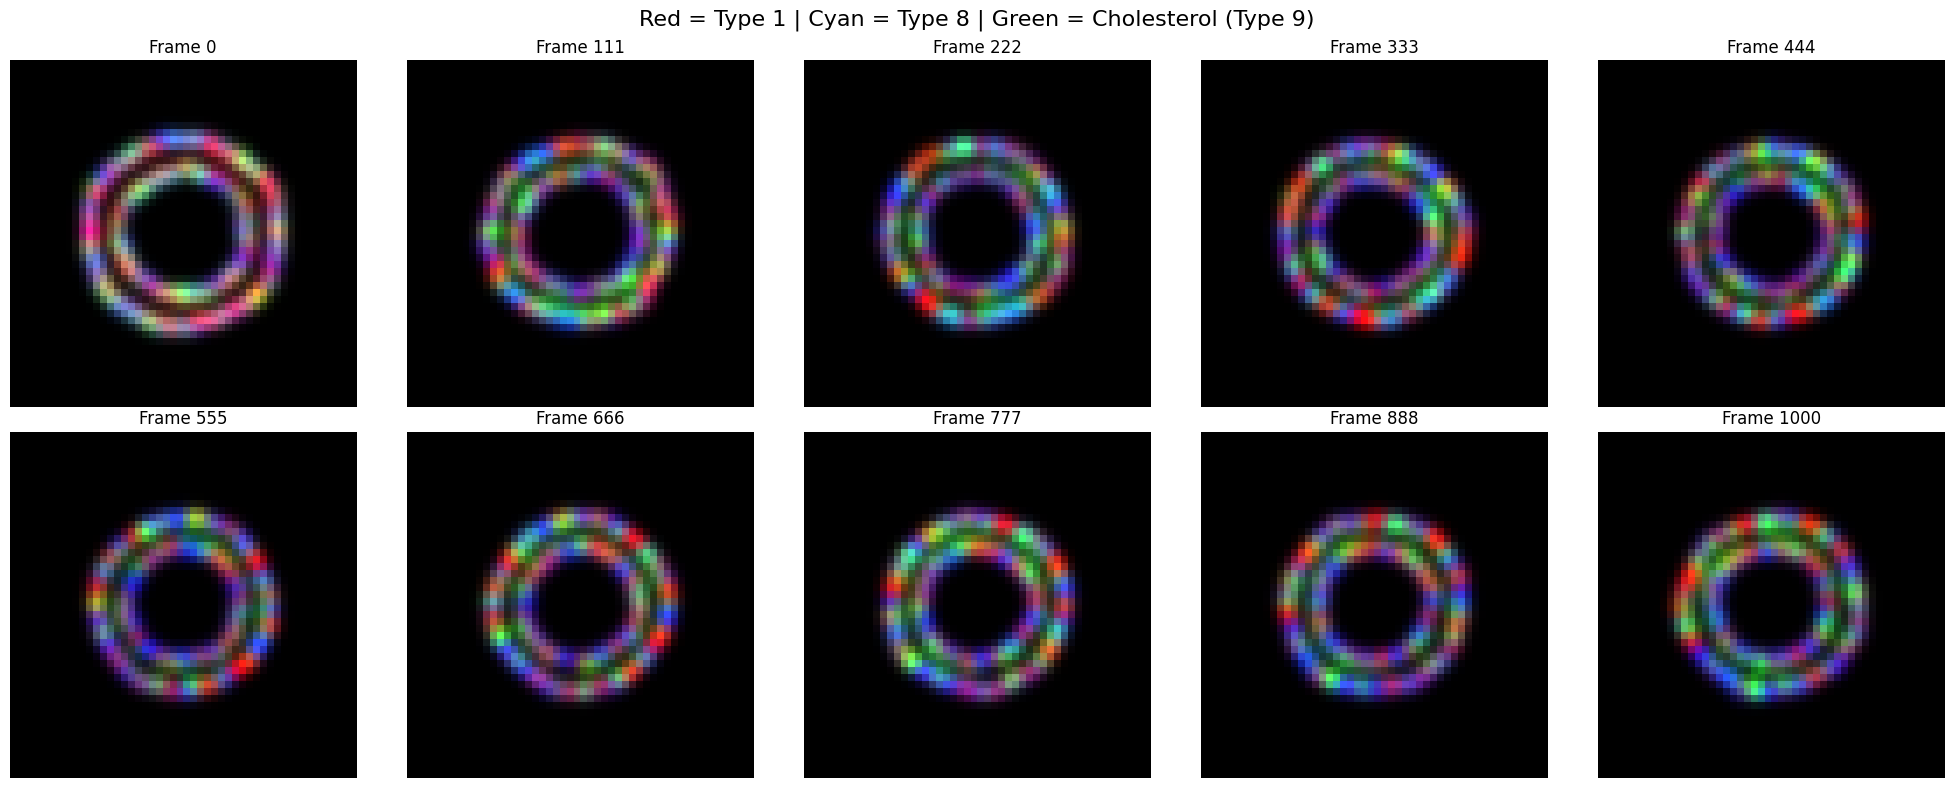

In [6]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load system
u = mda.Universe("system_after_min.data", "full_traj.lammpstrj", format="LAMMPSDUMP")

# Parameters
box = u.dimensions[:3]
ngrid = 50
z_slice = ngrid // 2
frame_indices = np.linspace(0, len(u.trajectory) - 1, 10, dtype=int)

# Function to bin and smooth particles
def get_type_density(atomgroup, box, ngrid):
    indices = (atomgroup.positions / box[:3] * ngrid).astype(int)
    indices = np.clip(indices, 0, ngrid - 1)
    grid = np.zeros((ngrid, ngrid, ngrid))
    for i in indices:
        grid[tuple(i)] += 1
    return gaussian_filter(grid, sigma=1)

# Setup plots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, i in zip(axes, frame_indices):
    u.trajectory[i]

    red = u.select_atoms("type 1")
    cyan = u.select_atoms("type 8")
    green = u.select_atoms("type 9")

    red_grid = get_type_density(red, box, ngrid)
    cyan_grid = get_type_density(cyan, box, ngrid)
    green_grid = get_type_density(green, box, ngrid)

    # Normalize each to max for consistent contrast
    r = red_grid[:, :, z_slice]
    g = green_grid[:, :, z_slice]
    b = cyan_grid[:, :, z_slice]
    
    rgb_image = np.stack([
        np.clip(r / r.max(), 0, 1),
        np.clip(g / g.max(), 0, 1),
        np.clip(b / b.max(), 0, 1)
    ], axis=-1)

    ax.imshow(rgb_image, origin='lower')
    ax.set_title(f"Frame {i}")
    ax.axis('off')

plt.suptitle("Red = Type 1 | Cyan = Type 8 | Green = Cholesterol (Type 9)", fontsize=16)
plt.tight_layout()
plt.show()


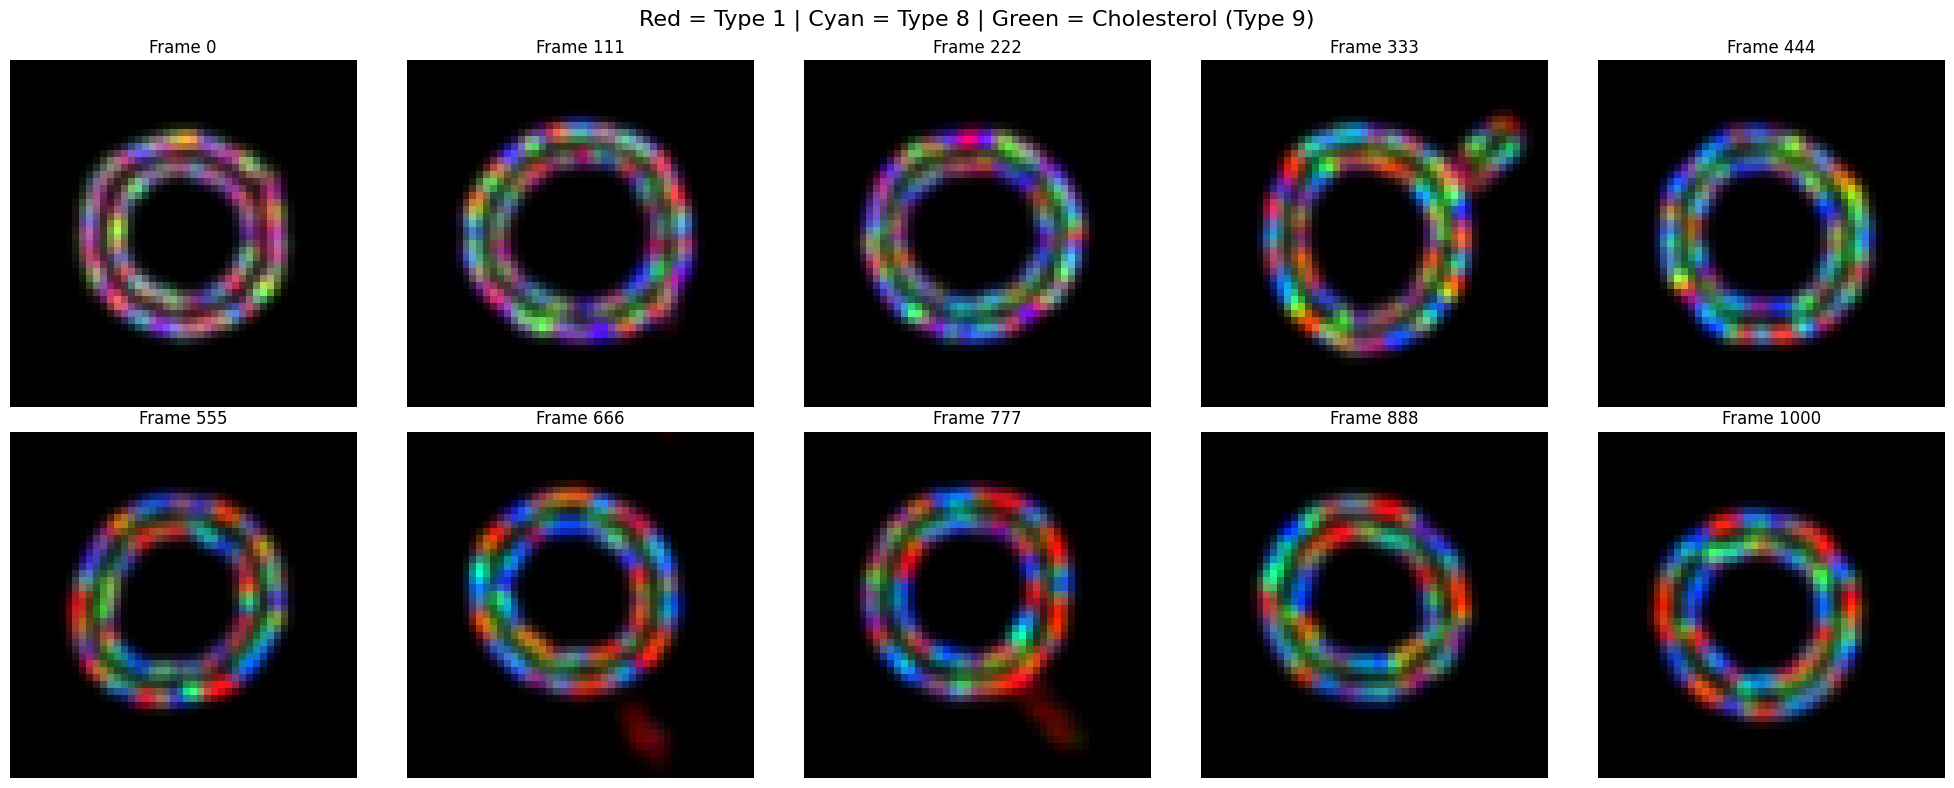

In [5]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load system
u = mda.Universe("system_after_min.data", "full_traj_adapt.lammpstrj", format="LAMMPSDUMP")

# Parameters
box = u.dimensions[:3]
ngrid = 50
z_slice = ngrid // 2
frame_indices = np.linspace(0, len(u.trajectory) - 1, 10, dtype=int)

# Function to bin and smooth particles
def get_type_density(atomgroup, box, ngrid):
    indices = (atomgroup.positions / box[:3] * ngrid).astype(int)
    indices = np.clip(indices, 0, ngrid - 1)
    grid = np.zeros((ngrid, ngrid, ngrid))
    for i in indices:
        grid[tuple(i)] += 1
    return gaussian_filter(grid, sigma=1)

# Setup plots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, i in zip(axes, frame_indices):
    u.trajectory[i]

    red = u.select_atoms("type 1")
    cyan = u.select_atoms("type 8")
    green = u.select_atoms("type 9")

    red_grid = get_type_density(red, box, ngrid)
    cyan_grid = get_type_density(cyan, box, ngrid)
    green_grid = get_type_density(green, box, ngrid)

    # Normalize each to max for consistent contrast
    r = red_grid[:, :, z_slice]
    g = green_grid[:, :, z_slice]
    b = cyan_grid[:, :, z_slice]
    
    rgb_image = np.stack([
        np.clip(r / r.max(), 0, 1),
        np.clip(g / g.max(), 0, 1),
        np.clip(b / b.max(), 0, 1)
    ], axis=-1)

    ax.imshow(rgb_image, origin='lower')
    ax.set_title(f"Frame {i}")
    ax.axis('off')

plt.suptitle("Red = Type 1 | Cyan = Type 8 | Green = Cholesterol (Type 9)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
'''
Even though we're assigning:

Red channel ← type 1 (saturated)

Green channel ← cholesterol (type 9)

Blue channel ← type 8 (unsaturated)

We're stacking them together as RGB, so:

Areas with both red and green → show up yellow

Areas with red and blue → show up magenta

Areas with green and blue → look teal or cyan-green

Areas with all three → appear white or grayish

Areas with none → are black

This is exactly how RGB color blending works — it’s additive color mixing'
'''

"\nEven though we're assigning:\n\nRed channel ← type 1\n\nGreen channel ← cholesterol (type 9)\n\nBlue channel ← type 8\n\nWe're stacking them together as RGB, so:\n\nAreas with both red and green → show up yellow\n\nAreas with red and blue → show up magenta\n\nAreas with green and blue → look teal or cyan-green\n\nAreas with all three → appear white or grayish\n\nAreas with none → are black\n\nThis is exactly how RGB color blending works — it’s additive color mixing'\n"

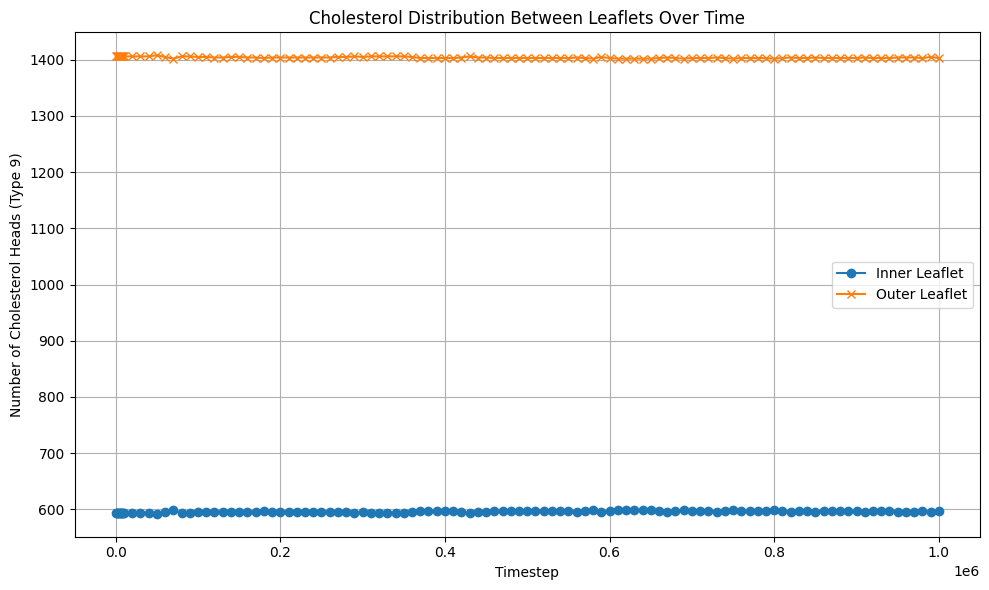

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to your LAMMPS trajectory file
trajectory_file_path = "full_traj.lammpstrj"

# Lists to store results
timesteps = []
inner_counts = []
outer_counts = []

# Read the trajectory
with open(trajectory_file_path, "r") as f:
    lines = f.readlines()

i = 0
last_sampled_timestep = -1

while i < len(lines):
    if "ITEM: TIMESTEP" in lines[i]:
        timestep = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: NUMBER OF ATOMS" in lines[i]:
        num_atoms = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: BOX BOUNDS" in lines[i]:
        i += 4
    elif "ITEM: ATOMS" in lines[i]:
        should_sample = False
        if timestep <= 10000:
            should_sample = (timestep % 1000 == 0)
        else:
            should_sample = (timestep % 10000 == 0)

        if should_sample and timestep != last_sampled_timestep:
            last_sampled_timestep = timestep
            atom_lines = lines[i + 1:i + 1 + num_atoms]
            coords = []

            for line in atom_lines:
                parts = line.strip().split()
                atom_type = int(parts[1])
                if atom_type == 9:
                    x, y, z = map(float, parts[2:5])
                    coords.append([x, y, z])

            coords = np.array(coords)

            if len(coords) > 0:
                center = coords.mean(axis=0)
                radial_distances = np.linalg.norm(coords - center, axis=1)

                r_reshaped = radial_distances.reshape(-1, 1)
                kmeans = KMeans(n_clusters=2, random_state=42).fit(r_reshaped)
                labels = kmeans.labels_
                centers = kmeans.cluster_centers_.flatten()

                inner_label = np.argmin(centers)
                outer_label = np.argmax(centers)

                inner_count = np.sum(labels == inner_label)
                outer_count = np.sum(labels == outer_label)
            else:
                inner_count = outer_count = 0

            timesteps.append(timestep)
            inner_counts.append(inner_count)
            outer_counts.append(outer_count)

        i += 1 + num_atoms
    else:
        i += 1

# Store results
df = pd.DataFrame({
    "Timestep": timesteps,
    "Inner Leaflet Count": inner_counts,
    "Outer Leaflet Count": outer_counts
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["Timestep"], df["Inner Leaflet Count"], label="Inner Leaflet", marker='o')
plt.plot(df["Timestep"], df["Outer Leaflet Count"], label="Outer Leaflet", marker='x')
plt.xlabel("Timestep")
plt.ylabel("Number of Cholesterol Heads (Type 9)")
#plt.ylim(520,650)
plt.title("Cholesterol Distribution Between Leaflets Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


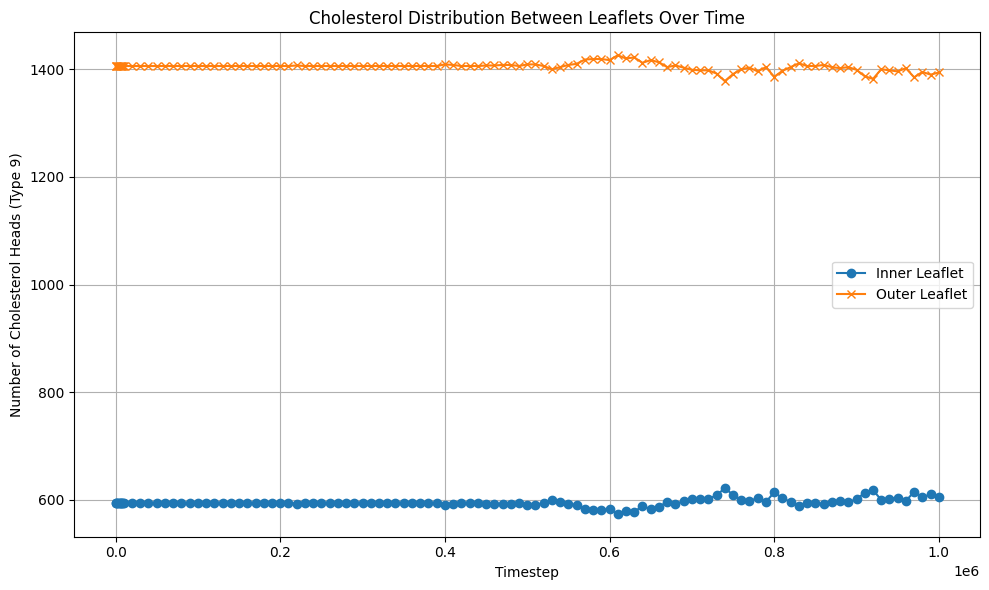

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to your LAMMPS trajectory file
trajectory_file_path = "full_traj_adapt.lammpstrj"

# Lists to store results
timesteps = []
inner_counts = []
outer_counts = []

# Read the trajectory
with open(trajectory_file_path, "r") as f:
    lines = f.readlines()

i = 0
last_sampled_timestep = -1

while i < len(lines):
    if "ITEM: TIMESTEP" in lines[i]:
        timestep = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: NUMBER OF ATOMS" in lines[i]:
        num_atoms = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: BOX BOUNDS" in lines[i]:
        i += 4
    elif "ITEM: ATOMS" in lines[i]:
        should_sample = False
        if timestep <= 10000:
            should_sample = (timestep % 1000 == 0)
        else:
            should_sample = (timestep % 10000 == 0)

        if should_sample and timestep != last_sampled_timestep:
            last_sampled_timestep = timestep
            atom_lines = lines[i + 1:i + 1 + num_atoms]
            coords = []

            for line in atom_lines:
                parts = line.strip().split()
                atom_type = int(parts[1])
                if atom_type == 9:
                    x, y, z = map(float, parts[2:5])
                    coords.append([x, y, z])

            coords = np.array(coords)

            if len(coords) > 0:
                center = coords.mean(axis=0)
                radial_distances = np.linalg.norm(coords - center, axis=1)

                r_reshaped = radial_distances.reshape(-1, 1)
                kmeans = KMeans(n_clusters=2, random_state=42).fit(r_reshaped)
                labels = kmeans.labels_
                centers = kmeans.cluster_centers_.flatten()

                inner_label = np.argmin(centers)
                outer_label = np.argmax(centers)

                inner_count = np.sum(labels == inner_label)
                outer_count = np.sum(labels == outer_label)
            else:
                inner_count = outer_count = 0

            timesteps.append(timestep)
            inner_counts.append(inner_count)
            outer_counts.append(outer_count)

        i += 1 + num_atoms
    else:
        i += 1

# Store results
df = pd.DataFrame({
    "Timestep": timesteps,
    "Inner Leaflet Count": inner_counts,
    "Outer Leaflet Count": outer_counts
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["Timestep"], df["Inner Leaflet Count"], label="Inner Leaflet", marker='o')
plt.plot(df["Timestep"], df["Outer Leaflet Count"], label="Outer Leaflet", marker='x')
plt.xlabel("Timestep")
plt.ylabel("Number of Cholesterol Heads (Type 9)")
#plt.ylim(520,650)
plt.title("Cholesterol Distribution Between Leaflets Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


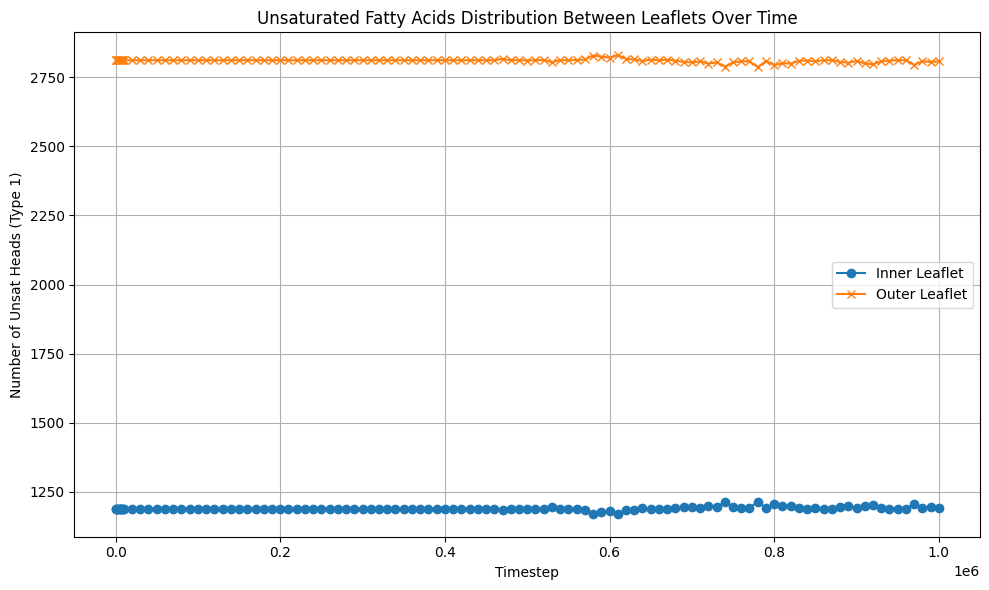

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to your LAMMPS trajectory file
trajectory_file_path = "full_traj_adapt.lammpstrj"

# Lists to store results
timesteps = []
inner_counts = []
outer_counts = []

# Read the trajectory
with open(trajectory_file_path, "r") as f:
    lines = f.readlines()

i = 0
last_sampled_timestep = -1

while i < len(lines):
    if "ITEM: TIMESTEP" in lines[i]:
        timestep = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: NUMBER OF ATOMS" in lines[i]:
        num_atoms = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: BOX BOUNDS" in lines[i]:
        i += 4
    elif "ITEM: ATOMS" in lines[i]:
        should_sample = False
        if timestep <= 10000:
            should_sample = (timestep % 1000 == 0)
        else:
            should_sample = (timestep % 10000 == 0)

        if should_sample and timestep != last_sampled_timestep:
            last_sampled_timestep = timestep
            atom_lines = lines[i + 1:i + 1 + num_atoms]
            coords = []

            for line in atom_lines:
                parts = line.strip().split()
                atom_type = int(parts[1])
                if atom_type == 1:
                    x, y, z = map(float, parts[2:5])
                    coords.append([x, y, z])

            coords = np.array(coords)

            if len(coords) > 0:
                center = coords.mean(axis=0)
                radial_distances = np.linalg.norm(coords - center, axis=1)

                r_reshaped = radial_distances.reshape(-1, 1)
                kmeans = KMeans(n_clusters=2, random_state=42).fit(r_reshaped)
                labels = kmeans.labels_
                centers = kmeans.cluster_centers_.flatten()

                inner_label = np.argmin(centers)
                outer_label = np.argmax(centers)

                inner_count = np.sum(labels == inner_label)
                outer_count = np.sum(labels == outer_label)
            else:
                inner_count = outer_count = 0

            timesteps.append(timestep)
            inner_counts.append(inner_count)
            outer_counts.append(outer_count)

        i += 1 + num_atoms
    else:
        i += 1

# Store results
df = pd.DataFrame({
    "Timestep": timesteps,
    "Inner Leaflet Count": inner_counts,
    "Outer Leaflet Count": outer_counts
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["Timestep"], df["Inner Leaflet Count"], label="Inner Leaflet", marker='o')
plt.plot(df["Timestep"], df["Outer Leaflet Count"], label="Outer Leaflet", marker='x')
plt.xlabel("Timestep")
plt.ylabel("Number of Unsat Heads (Type 1)")
#plt.ylim(520,650)
plt.title("Unsaturated Fatty Acids Distribution Between Leaflets Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


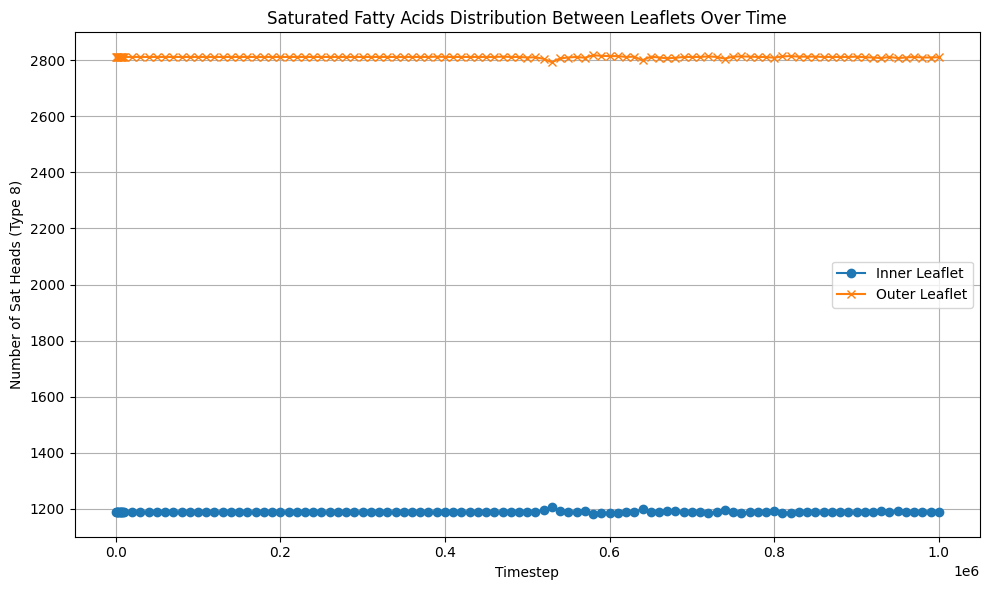

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to your LAMMPS trajectory file
trajectory_file_path = "full_traj_adapt.lammpstrj"

# Lists to store results
timesteps = []
inner_counts = []
outer_counts = []

# Read the trajectory
with open(trajectory_file_path, "r") as f:
    lines = f.readlines()

i = 0
last_sampled_timestep = -1

while i < len(lines):
    if "ITEM: TIMESTEP" in lines[i]:
        timestep = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: NUMBER OF ATOMS" in lines[i]:
        num_atoms = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: BOX BOUNDS" in lines[i]:
        i += 4
    elif "ITEM: ATOMS" in lines[i]:
        should_sample = False
        if timestep <= 10000:
            should_sample = (timestep % 1000 == 0)
        else:
            should_sample = (timestep % 10000 == 0)

        if should_sample and timestep != last_sampled_timestep:
            last_sampled_timestep = timestep
            atom_lines = lines[i + 1:i + 1 + num_atoms]
            coords = []

            for line in atom_lines:
                parts = line.strip().split()
                atom_type = int(parts[1])
                if atom_type == 8:
                    x, y, z = map(float, parts[2:5])
                    coords.append([x, y, z])

            coords = np.array(coords)

            if len(coords) > 0:
                center = coords.mean(axis=0)
                radial_distances = np.linalg.norm(coords - center, axis=1)

                r_reshaped = radial_distances.reshape(-1, 1)
                kmeans = KMeans(n_clusters=2, random_state=42).fit(r_reshaped)
                labels = kmeans.labels_
                centers = kmeans.cluster_centers_.flatten()

                inner_label = np.argmin(centers)
                outer_label = np.argmax(centers)

                inner_count = np.sum(labels == inner_label)
                outer_count = np.sum(labels == outer_label)
            else:
                inner_count = outer_count = 0

            timesteps.append(timestep)
            inner_counts.append(inner_count)
            outer_counts.append(outer_count)

        i += 1 + num_atoms
    else:
        i += 1

# Store results
df = pd.DataFrame({
    "Timestep": timesteps,
    "Inner Leaflet Count": inner_counts,
    "Outer Leaflet Count": outer_counts
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["Timestep"], df["Inner Leaflet Count"], label="Inner Leaflet", marker='o')
plt.plot(df["Timestep"], df["Outer Leaflet Count"], label="Outer Leaflet", marker='x')
plt.xlabel("Timestep")
plt.ylabel("Number of Sat Heads (Type 8)")
#plt.ylim(520,650)
plt.title("Saturated Fatty Acids Distribution Between Leaflets Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


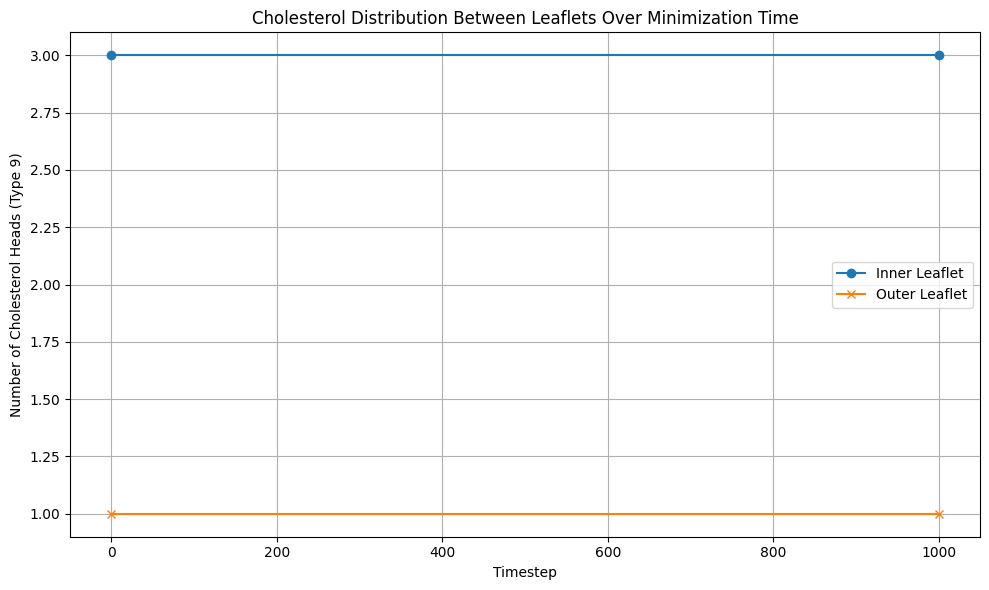

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to your LAMMPS trajectory file
trajectory_file_path = "traj_min.lammpstrj"

# Lists to store results
timesteps = []
inner_counts = []
outer_counts = []

# Read the trajectory
with open(trajectory_file_path, "r") as f:
    lines = f.readlines()

i = 0
last_sampled_timestep = -1

while i < len(lines):
    if "ITEM: TIMESTEP" in lines[i]:
        timestep = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: NUMBER OF ATOMS" in lines[i]:
        num_atoms = int(lines[i + 1].strip())
        i += 2
    elif "ITEM: BOX BOUNDS" in lines[i]:
        i += 4
    elif "ITEM: ATOMS" in lines[i]:
        should_sample = False
        if timestep <= 10000:
            should_sample = (timestep % 1000 == 0)
        else:
            should_sample = (timestep % 10000 == 0)

        if should_sample and timestep != last_sampled_timestep:
            last_sampled_timestep = timestep
            atom_lines = lines[i + 1:i + 1 + num_atoms]
            coords = []

            for line in atom_lines:
                parts = line.strip().split()
                atom_type = int(parts[1])
                if atom_type == 9:
                    x, y, z = map(float, parts[2:5])
                    coords.append([x, y, z])

            coords = np.array(coords)

            if len(coords) > 0:
                center = coords.mean(axis=0)
                radial_distances = np.linalg.norm(coords - center, axis=1)

                r_reshaped = radial_distances.reshape(-1, 1)
                kmeans = KMeans(n_clusters=2, random_state=42).fit(r_reshaped)
                labels = kmeans.labels_
                centers = kmeans.cluster_centers_.flatten()

                inner_label = np.argmin(centers)
                outer_label = np.argmax(centers)

                inner_count = np.sum(labels == inner_label)
                outer_count = np.sum(labels == outer_label)
            else:
                inner_count = outer_count = 0

            timesteps.append(timestep)
            inner_counts.append(inner_count)
            outer_counts.append(outer_count)

        i += 1 + num_atoms
    else:
        i += 1

# Store results
df = pd.DataFrame({
    "Timestep": timesteps,
    "Inner Leaflet Count": inner_counts,
    "Outer Leaflet Count": outer_counts
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["Timestep"], df["Inner Leaflet Count"], label="Inner Leaflet", marker='o')
plt.plot(df["Timestep"], df["Outer Leaflet Count"], label="Outer Leaflet", marker='x')
plt.xlabel("Timestep")
plt.ylabel("Number of Cholesterol Heads (Type 9)")
#plt.ylim(520,650)
plt.title("Cholesterol Distribution Between Leaflets Over Minimization Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
